In [1]:
from modules.quicklook.src.analyze_time_series import AnalyzeTimeSeries
import pandas as pd
import matplotlib.pyplot as plt
import os
import copy
import numpy as np
import time
import matplotlib.dates as mdates
from datetime import datetime
from astropy.table import Table
from astropy.io import fits
%matplotlib inline

In [2]:
db_path = '../kpf_ts_oct2024_v2.db' # name of database file
myTS = AnalyzeTimeSeries(db_path=db_path)
columns_to_display = [
    'ObsID', 'OBJECT', 'DATE-MID', 
    'RV100', 'RV200', 'RV300']
myTS.display_dataframe_from_db(columns_to_display)

INFO: Starting AnalyzeTimeSeries
INFO: Jupyter Notebook environment detected.
INFO: Path of database file: /code/KPF-Pipeline/kpf_ts_oct2024_v2.db
INFO: Base data directory: /data/L0
INFO: Primary table 'kpfdb' created/updated successfully.
INFO: Metadata table 'kpfdb_metadata' created/updated successfully.
INFO: Summary: 14928 obs x 1188 cols over 27 days in 20241001-20241027; updated 2025-02-06 18:56:34
                      ObsID                    OBJECT  \
0      KP.20241008.31459.57  autocal-etalon-all-night   
1      KP.20241008.25014.55  autocal-etalon-all-night   
2      KP.20241001.10301.86    autocal-etalon-all-eve   
3      KP.20241001.07291.81      autocal-thar-all-eve   
4      KP.20241001.00018.07          autocal-flat-all   
...                     ...                       ...   
14923  KP.20241027.71891.69               WideFlat_f4   
14924  KP.20241027.71942.46               WideFlat_f4   
14925  KP.20241027.71992.22               WideFlat_f5   
14926  KP.20241027.72

In [6]:
df = myTS.dataframe_from_db(columns_to_display)

INFO: Plotting from config: /code/KPF-Pipeline/static/tsdb_plot_configs/RV/autocal_etalon_rv.yaml


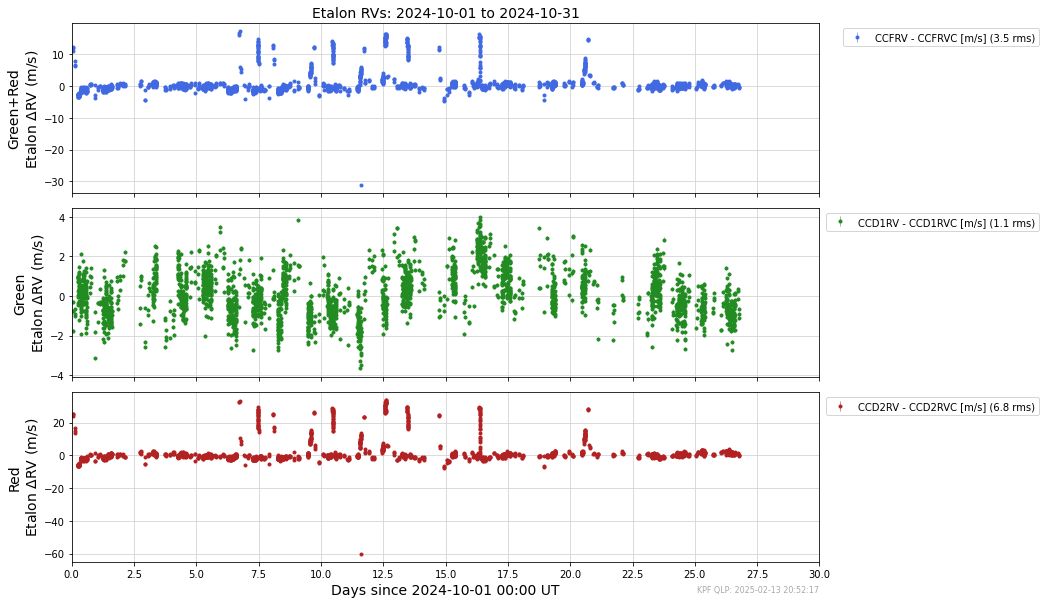

In [7]:
start_date = datetime(2024, 10, 1)
end_date   = datetime(2024, 10, 31)
myTS.plot_time_series_multipanel('autocal_etalon_rv', start_date=start_date, end_date=end_date, show_plot=True, clean=True)

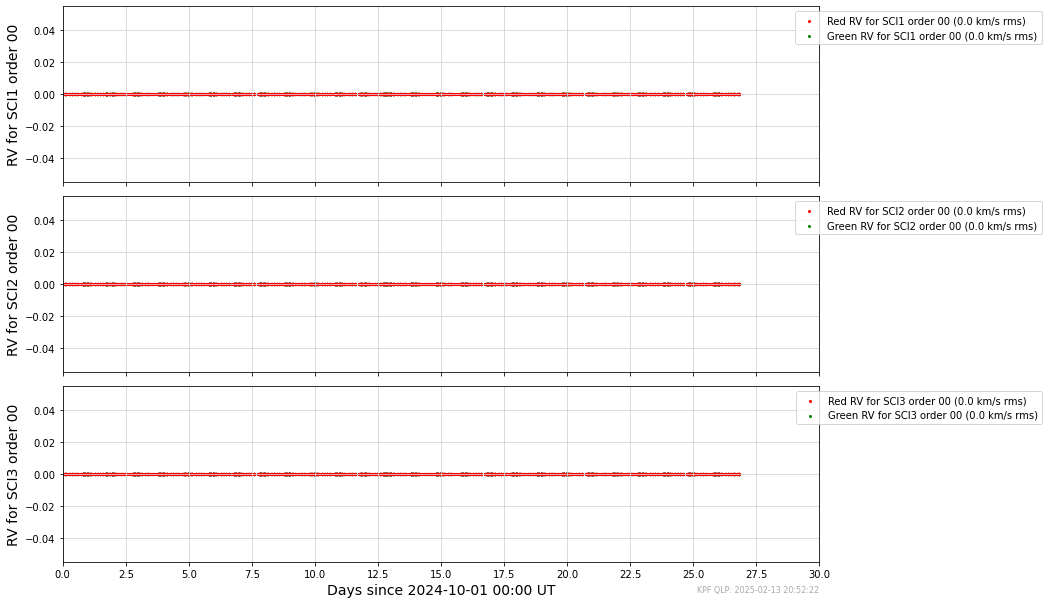

In [8]:
dict1 = {'col': 'RV100', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Green RV for SCI1 order 00', 'marker': '.', 'linewidth': 0.05, 'color': 'green'}}
dict2 = {'col': 'RV135', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Red RV for SCI1 order 00', 'marker': '.', 'linewidth': 0.05, 'color': 'red'}}
dict3 = {'col': 'RV200', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Green RV for SCI2 order 00', 'marker': '.', 'linewidth': 0.05, 'color': 'green'}}
dict4 = {'col': 'RV235', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Red RV for SCI2 order 00', 'marker': '.', 'linewidth': 0.05, 'color': 'red'}}
dict5 = {'col': 'RV300', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Green RV for SCI3 order 00', 'marker': '.', 'linewidth': 0.05, 'color': 'green'}}
dict6 = {'col': 'RV335', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Red RV for SCI3 order 00', 'marker': '.', 'linewidth': 0.05, 'color': 'red'}}
thispanelvars = [dict1, dict2]
thispaneldict = {'ylabel': 'RV for SCI1 order 00',
                 'legend_frac_size': 0.3}
orderletpanel1 = {'panelvars': thispanelvars,
                 'paneldict': thispaneldict}

thispanelvars2 = [dict3, dict4]
thispaneldict2 = {'ylabel': 'RV for SCI2 order 00',
                 'legend_frac_size': 0.3}
orderletpanel2 = {'panelvars': thispanelvars2,
                  'paneldict': thispaneldict2}

thispanelvars3 = [dict5, dict6]
thispaneldict3 = {'ylabel': 'RV for SCI3 order 00',
                 'subtractmedian': 'true',
                 'legend_frac_size': 0.3}
orderletpanel3 = {'panelvars': thispanelvars3,
                  'paneldict': thispaneldict3}

panel_arr = [orderletpanel1, orderletpanel2, orderletpanel3]

plotdict = {
             "description": "Etalon RVs per orderlet",
             "plot_type": "time_series_multipanel",
             "panel_arr": panel_arr
            }

myTS.plot_time_series_multipanel(plotdict, start_date=start_date, end_date=end_date, show_plot=True, clean=True)

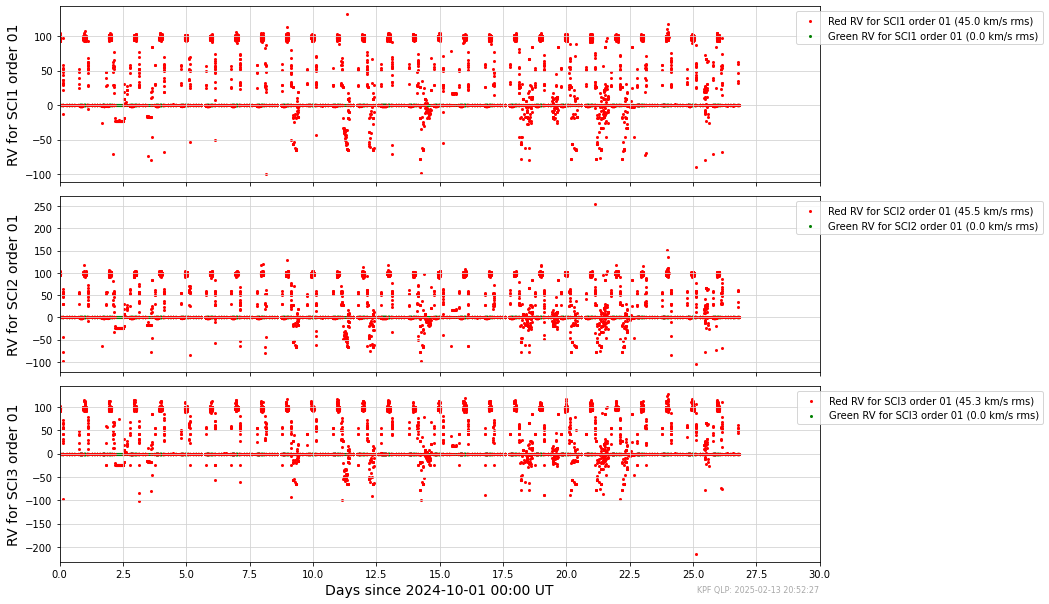

In [9]:
dict1 = {'col': 'RV101', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Green RV for SCI1 order 01', 'marker': '.', 'linewidth': 0.05, 'color': 'green'}}
dict2 = {'col': 'RV136', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Red RV for SCI1 order 01', 'marker': '.', 'linewidth': 0.05, 'color': 'red'}}
dict3 = {'col': 'RV201', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Green RV for SCI2 order 01', 'marker': '.', 'linewidth': 0.05, 'color': 'green'}}
dict4 = {'col': 'RV236', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Red RV for SCI2 order 01', 'marker': '.', 'linewidth': 0.05, 'color': 'red'}}
dict5 = {'col': 'RV301', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Green RV for SCI3 order 01', 'marker': '.', 'linewidth': 0.05, 'color': 'green'}}
dict6 = {'col': 'RV336', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Red RV for SCI3 order 01', 'marker': '.', 'linewidth': 0.05, 'color': 'red'}}
thispanelvars = [dict1, dict2]
thispaneldict = {'ylabel': 'RV for SCI1 order 01',
                 'legend_frac_size': 0.3}
orderletpanel1 = {'panelvars': thispanelvars,
                 'paneldict': thispaneldict}

thispanelvars2 = [dict3, dict4]
thispaneldict2 = {'ylabel': 'RV for SCI2 order 01',
                 'legend_frac_size': 0.3}
orderletpanel2 = {'panelvars': thispanelvars2,
                  'paneldict': thispaneldict2}

thispanelvars3 = [dict5, dict6]
thispaneldict3 = {'ylabel': 'RV for SCI3 order 01',
                 'subtractmedian': 'true',
                 'legend_frac_size': 0.3}
orderletpanel3 = {'panelvars': thispanelvars3,
                  'paneldict': thispaneldict3}

panel_arr = [orderletpanel1, orderletpanel2, orderletpanel3]

plotdict = {
             "description": "Etalon RVs per orderlet",
             "plot_type": "time_series_multipanel",
             "panel_arr": panel_arr
            }

myTS.plot_time_series_multipanel(plotdict, start_date=start_date, end_date=end_date, show_plot=True, clean=True)

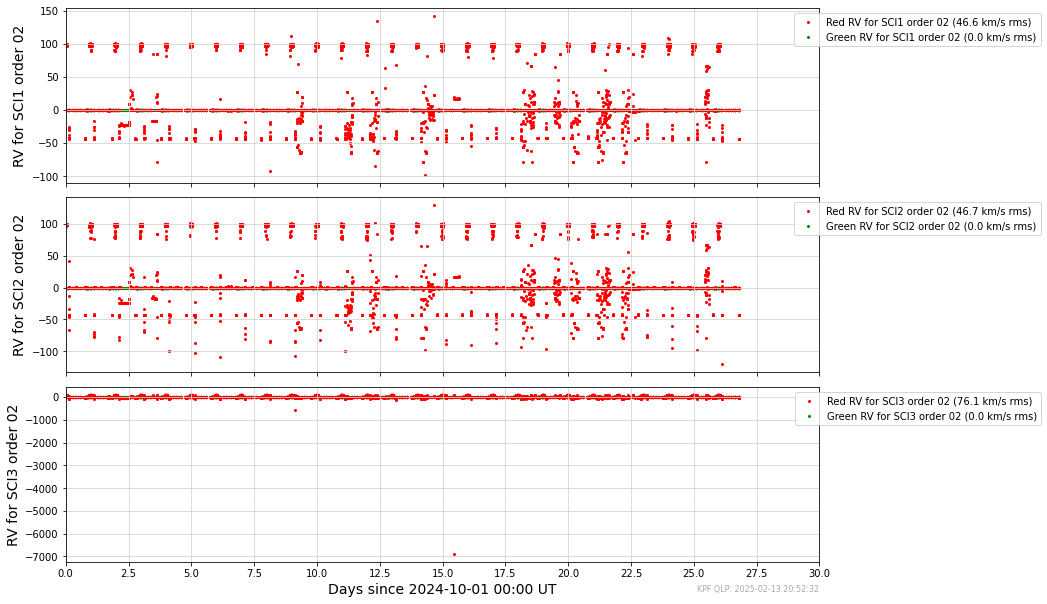

In [10]:
dict1 = {'col': 'RV102', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Green RV for SCI1 order 02', 'marker': '.', 'linewidth': 0.05, 'color': 'green'}}
dict2 = {'col': 'RV137', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Red RV for SCI1 order 02', 'marker': '.', 'linewidth': 0.05, 'color': 'red'}}
dict3 = {'col': 'RV202', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Green RV for SCI2 order 02', 'marker': '.', 'linewidth': 0.05, 'color': 'green'}}
dict4 = {'col': 'RV237', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Red RV for SCI2 order 02', 'marker': '.', 'linewidth': 0.05, 'color': 'red'}}
dict5 = {'col': 'RV302', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Green RV for SCI3 order 02', 'marker': '.', 'linewidth': 0.05, 'color': 'green'}}
dict6 = {'col': 'RV337', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Red RV for SCI3 order 02', 'marker': '.', 'linewidth': 0.05, 'color': 'red'}}
thispanelvars = [dict1, dict2]
thispaneldict = {'ylabel': 'RV for SCI1 order 02',
                 'legend_frac_size': 0.3}
orderletpanel1 = {'panelvars': thispanelvars,
                 'paneldict': thispaneldict}

thispanelvars2 = [dict3, dict4]
thispaneldict2 = {'ylabel': 'RV for SCI2 order 02',
                 'legend_frac_size': 0.3}
orderletpanel2 = {'panelvars': thispanelvars2,
                  'paneldict': thispaneldict2}

thispanelvars3 = [dict5, dict6]
thispaneldict3 = {'ylabel': 'RV for SCI3 order 02',
                 'subtractmedian': 'true',
                 'legend_frac_size': 0.3}
orderletpanel3 = {'panelvars': thispanelvars3,
                  'paneldict': thispaneldict3}

panel_arr = [orderletpanel1, orderletpanel2, orderletpanel3]

plotdict = {
             "description": "Etalon RVs per orderlet",
             "plot_type": "time_series_multipanel",
             "panel_arr": panel_arr
            }

myTS.plot_time_series_multipanel(plotdict, start_date=start_date, end_date=end_date, show_plot=True, clean=True)

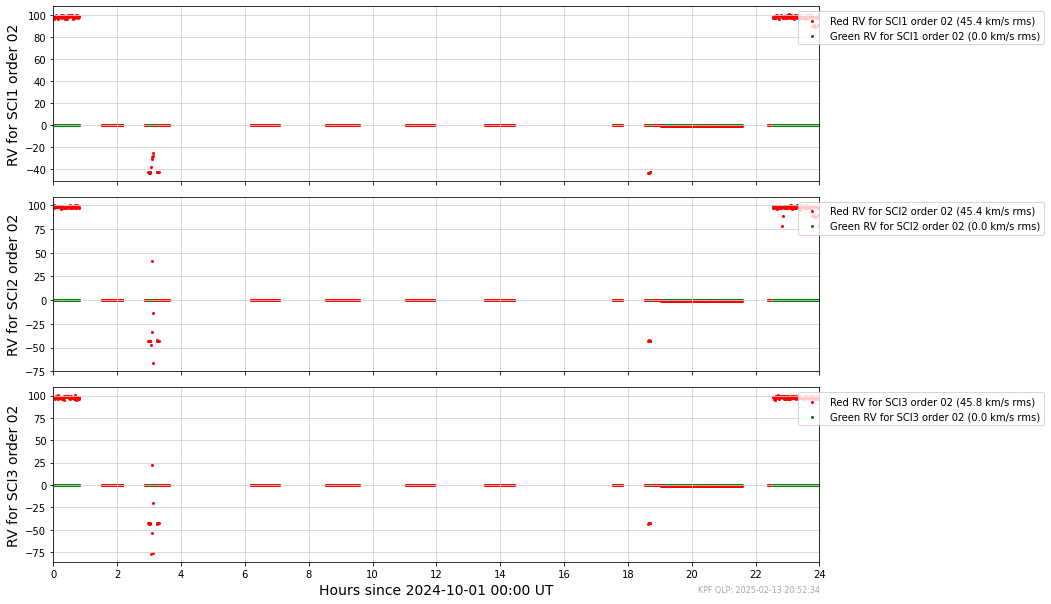

In [11]:
start_date = datetime(2024, 10, 1)
end_date   = datetime(2024, 10, 2)
dict1 = {'col': 'RV102', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Green RV for SCI1 order 02', 'marker': '.', 'linewidth': 0.05, 'color': 'green'}}
dict2 = {'col': 'RV137', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Red RV for SCI1 order 02', 'marker': '.', 'linewidth': 0.05, 'color': 'red'}}
dict3 = {'col': 'RV202', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Green RV for SCI2 order 02', 'marker': '.', 'linewidth': 0.05, 'color': 'green'}}
dict4 = {'col': 'RV237', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Red RV for SCI2 order 02', 'marker': '.', 'linewidth': 0.05, 'color': 'red'}}
dict5 = {'col': 'RV302', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Green RV for SCI3 order 02', 'marker': '.', 'linewidth': 0.05, 'color': 'green'}}
dict6 = {'col': 'RV337', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Red RV for SCI3 order 02', 'marker': '.', 'linewidth': 0.05, 'color': 'red'}}
thispanelvars = [dict1, dict2]
thispaneldict = {'ylabel': 'RV for SCI1 order 02',
                 'legend_frac_size': 0.3}
orderletpanel1 = {'panelvars': thispanelvars,
                 'paneldict': thispaneldict}

thispanelvars2 = [dict3, dict4]
thispaneldict2 = {'ylabel': 'RV for SCI2 order 02',
                 'legend_frac_size': 0.3}
orderletpanel2 = {'panelvars': thispanelvars2,
                  'paneldict': thispaneldict2}

thispanelvars3 = [dict5, dict6]
thispaneldict3 = {'ylabel': 'RV for SCI3 order 02',
                 'subtractmedian': 'true',
                 'legend_frac_size': 0.3}
orderletpanel3 = {'panelvars': thispanelvars3,
                  'paneldict': thispaneldict3}

panel_arr = [orderletpanel1, orderletpanel2, orderletpanel3]

plotdict = {
             "description": "Etalon RVs per orderlet",
             "plot_type": "time_series_multipanel",
             "panel_arr": panel_arr
            }

myTS.plot_time_series_multipanel(plotdict, start_date=start_date, end_date=end_date, show_plot=True, clean=True)

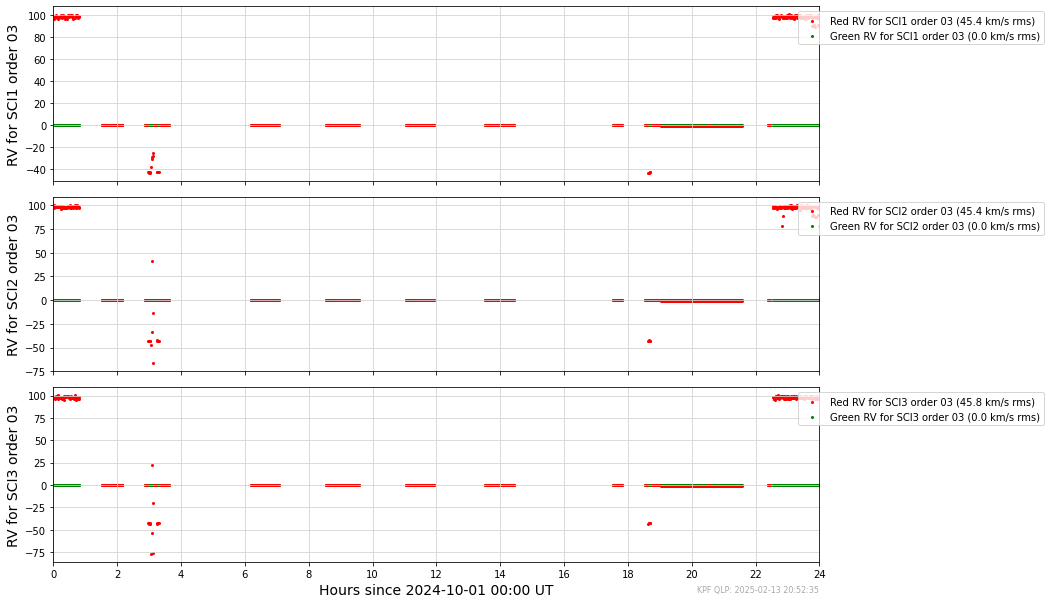

In [12]:
dict1 = {'col': 'RV102', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Green RV for SCI1 order 03', 'marker': '.', 'linewidth': 0.05, 'color': 'green'}}
dict2 = {'col': 'RV137', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Red RV for SCI1 order 03', 'marker': '.', 'linewidth': 0.05, 'color': 'red'}}
dict3 = {'col': 'RV202', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Green RV for SCI2 order 03', 'marker': '.', 'linewidth': 0.05, 'color': 'green'}}
dict4 = {'col': 'RV237', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Red RV for SCI2 order 03', 'marker': '.', 'linewidth': 0.05, 'color': 'red'}}
dict5 = {'col': 'RV302', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Green RV for SCI3 order 03', 'marker': '.', 'linewidth': 0.05, 'color': 'green'}}
dict6 = {'col': 'RV337', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Red RV for SCI3 order 03', 'marker': '.', 'linewidth': 0.05, 'color': 'red'}}
thispanelvars = [dict1, dict2]
thispaneldict = {'ylabel': 'RV for SCI1 order 03',
                 'legend_frac_size': 0.3}
orderletpanel1 = {'panelvars': thispanelvars,
                 'paneldict': thispaneldict}

thispanelvars2 = [dict3, dict4]
thispaneldict2 = {'ylabel': 'RV for SCI2 order 03',
                 'legend_frac_size': 0.3}
orderletpanel2 = {'panelvars': thispanelvars2,
                  'paneldict': thispaneldict2}

thispanelvars3 = [dict5, dict6]
thispaneldict3 = {'ylabel': 'RV for SCI3 order 03',
                 'subtractmedian': 'true',
                 'legend_frac_size': 0.3}
orderletpanel3 = {'panelvars': thispanelvars3,
                  'paneldict': thispaneldict3}

panel_arr = [orderletpanel1, orderletpanel2, orderletpanel3]

plotdict = {
             "description": "Etalon RVs per orderlet",
             "plot_type": "time_series_multipanel",
             "panel_arr": panel_arr
            }

myTS.plot_time_series_multipanel(plotdict, start_date=start_date, end_date=end_date, show_plot=True, clean=True)

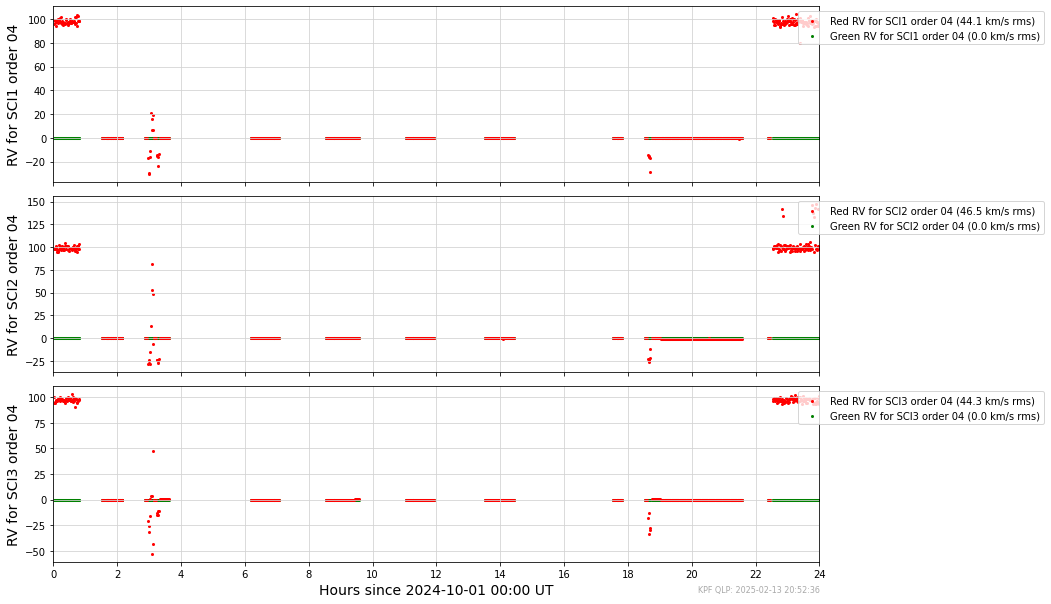

In [13]:
dict1 = {'col': 'RV103', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Green RV for SCI1 order 04', 'marker': '.', 'linewidth': 0.05, 'color': 'green'}}
dict2 = {'col': 'RV138', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Red RV for SCI1 order 04', 'marker': '.', 'linewidth': 0.05, 'color': 'red'}}
dict3 = {'col': 'RV203', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Green RV for SCI2 order 04', 'marker': '.', 'linewidth': 0.05, 'color': 'green'}}
dict4 = {'col': 'RV238', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Red RV for SCI2 order 04', 'marker': '.', 'linewidth': 0.05, 'color': 'red'}}
dict5 = {'col': 'RV303', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Green RV for SCI3 order 04', 'marker': '.', 'linewidth': 0.05, 'color': 'green'}}
dict6 = {'col': 'RV338', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Red RV for SCI3 order 04', 'marker': '.', 'linewidth': 0.05, 'color': 'red'}}
thispanelvars = [dict1, dict2]
thispaneldict = {'ylabel': 'RV for SCI1 order 04',
                 'legend_frac_size': 0.3}
orderletpanel1 = {'panelvars': thispanelvars,
                 'paneldict': thispaneldict}

thispanelvars2 = [dict3, dict4]
thispaneldict2 = {'ylabel': 'RV for SCI2 order 04',
                 'legend_frac_size': 0.3}
orderletpanel2 = {'panelvars': thispanelvars2,
                  'paneldict': thispaneldict2}

thispanelvars3 = [dict5, dict6]
thispaneldict3 = {'ylabel': 'RV for SCI3 order 04',
                 'subtractmedian': 'true',
                 'legend_frac_size': 0.3}
orderletpanel3 = {'panelvars': thispanelvars3,
                  'paneldict': thispaneldict3}

panel_arr = [orderletpanel1, orderletpanel2, orderletpanel3]

plotdict = {
             "description": "Etalon RVs per orderlet",
             "plot_type": "time_series_multipanel",
             "panel_arr": panel_arr
            }

myTS.plot_time_series_multipanel(plotdict, start_date=start_date, end_date=end_date, show_plot=True, clean=True)

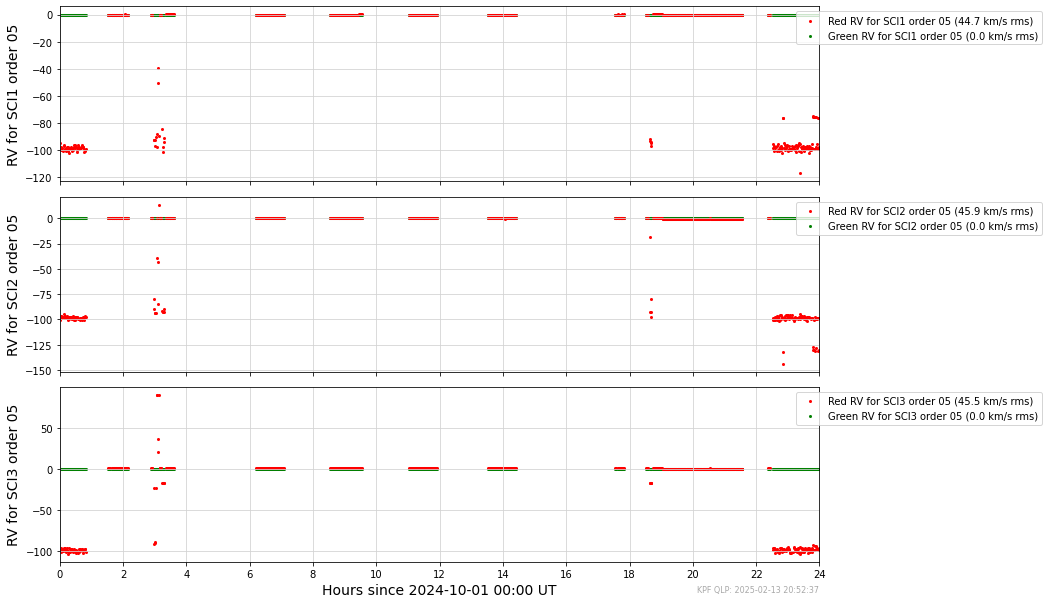

In [14]:
dict1 = {'col': 'RV104', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Green RV for SCI1 order 05', 'marker': '.', 'linewidth': 0.05, 'color': 'green'}}
dict2 = {'col': 'RV139', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Red RV for SCI1 order 05', 'marker': '.', 'linewidth': 0.05, 'color': 'red'}}
dict3 = {'col': 'RV204', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Green RV for SCI2 order 05', 'marker': '.', 'linewidth': 0.05, 'color': 'green'}}
dict4 = {'col': 'RV239', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Red RV for SCI2 order 05', 'marker': '.', 'linewidth': 0.05, 'color': 'red'}}
dict5 = {'col': 'RV304', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Green RV for SCI3 order 05', 'marker': '.', 'linewidth': 0.05, 'color': 'green'}}
dict6 = {'col': 'RV339', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Red RV for SCI3 order 05', 'marker': '.', 'linewidth': 0.05, 'color': 'red'}}
thispanelvars = [dict1, dict2]
thispaneldict = {'ylabel': 'RV for SCI1 order 05',
                 'legend_frac_size': 0.3}
orderletpanel1 = {'panelvars': thispanelvars,
                 'paneldict': thispaneldict}

thispanelvars2 = [dict3, dict4]
thispaneldict2 = {'ylabel': 'RV for SCI2 order 05',
                 'legend_frac_size': 0.3}
orderletpanel2 = {'panelvars': thispanelvars2,
                  'paneldict': thispaneldict2}

thispanelvars3 = [dict5, dict6]
thispaneldict3 = {'ylabel': 'RV for SCI3 order 05',
                 'subtractmedian': 'true',
                 'legend_frac_size': 0.3}
orderletpanel3 = {'panelvars': thispanelvars3,
                  'paneldict': thispaneldict3}

panel_arr = [orderletpanel1, orderletpanel2, orderletpanel3]

plotdict = {
             "description": "Etalon RVs per orderlet",
             "plot_type": "time_series_multipanel",
             "panel_arr": panel_arr
            }

myTS.plot_time_series_multipanel(plotdict, start_date=start_date, end_date=end_date, show_plot=True, clean=True)

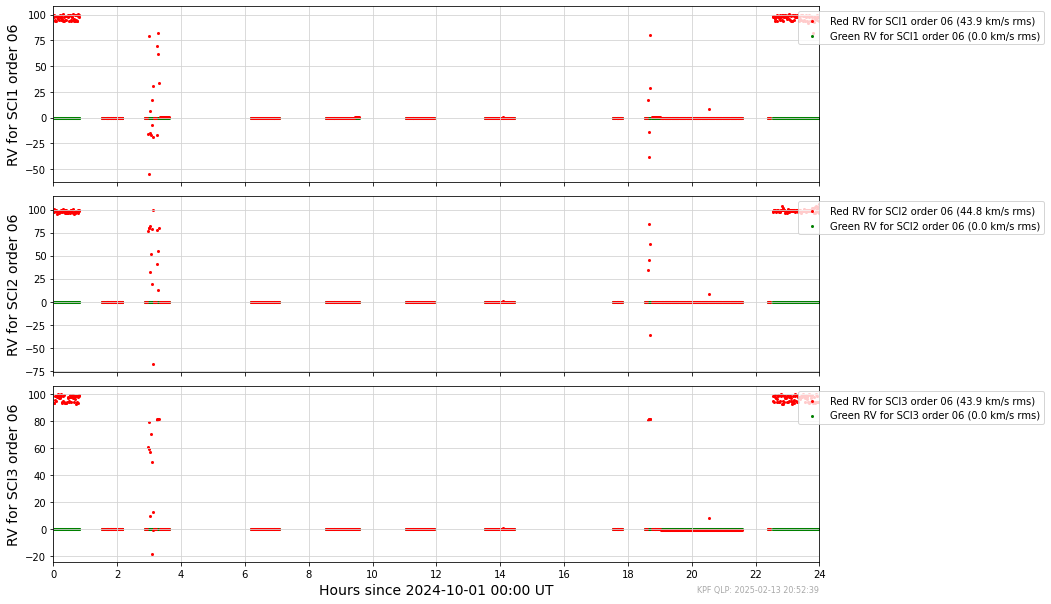

In [15]:
dict1 = {'col': 'RV105', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Green RV for SCI1 order 06', 'marker': '.', 'linewidth': 0.05, 'color': 'green'}}
dict2 = {'col': 'RV140', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Red RV for SCI1 order 06', 'marker': '.', 'linewidth': 0.05, 'color': 'red'}}
dict3 = {'col': 'RV205', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Green RV for SCI2 order 06', 'marker': '.', 'linewidth': 0.05, 'color': 'green'}}
dict4 = {'col': 'RV240', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Red RV for SCI2 order 06', 'marker': '.', 'linewidth': 0.05, 'color': 'red'}}
dict5 = {'col': 'RV305', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Green RV for SCI3 order 06', 'marker': '.', 'linewidth': 0.05, 'color': 'green'}}
dict6 = {'col': 'RV340', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Red RV for SCI3 order 06', 'marker': '.', 'linewidth': 0.05, 'color': 'red'}}
thispanelvars = [dict1, dict2]
thispaneldict = {'ylabel': 'RV for SCI1 order 06',
                 'legend_frac_size': 0.3}
orderletpanel1 = {'panelvars': thispanelvars,
                 'paneldict': thispaneldict}

thispanelvars2 = [dict3, dict4]
thispaneldict2 = {'ylabel': 'RV for SCI2 order 06',
                 'legend_frac_size': 0.3}
orderletpanel2 = {'panelvars': thispanelvars2,
                  'paneldict': thispaneldict2}

thispanelvars3 = [dict5, dict6]
thispaneldict3 = {'ylabel': 'RV for SCI3 order 06',
                 'subtractmedian': 'true',
                 'legend_frac_size': 0.3}
orderletpanel3 = {'panelvars': thispanelvars3,
                  'paneldict': thispaneldict3}

panel_arr = [orderletpanel1, orderletpanel2, orderletpanel3]

plotdict = {
             "description": "Etalon RVs per orderlet",
             "plot_type": "time_series_multipanel",
             "panel_arr": panel_arr
            }

myTS.plot_time_series_multipanel(plotdict, start_date=start_date, end_date=end_date, show_plot=True, clean=True)

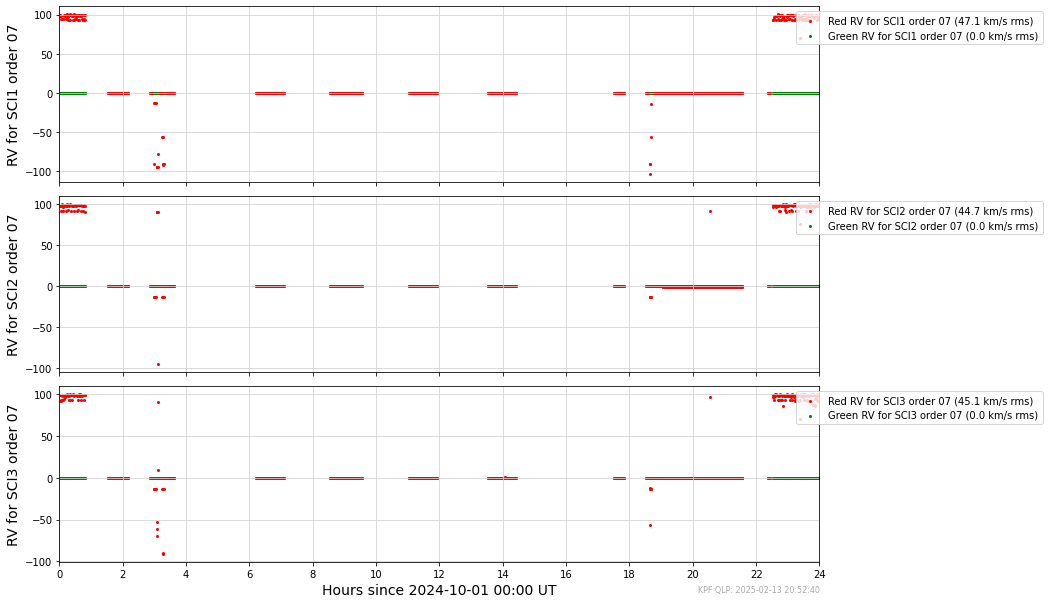

In [16]:
dict1 = {'col': 'RV106', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Green RV for SCI1 order 07', 'marker': '.', 'linewidth': 0.05, 'color': 'green'}}
dict2 = {'col': 'RV141', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Red RV for SCI1 order 07', 'marker': '.', 'linewidth': 0.05, 'color': 'red'}}
dict3 = {'col': 'RV206', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Green RV for SCI2 order 07', 'marker': '.', 'linewidth': 0.05, 'color': 'green'}}
dict4 = {'col': 'RV241', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Red RV for SCI2 order 07', 'marker': '.', 'linewidth': 0.05, 'color': 'red'}}
dict5 = {'col': 'RV306', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Green RV for SCI3 order 07', 'marker': '.', 'linewidth': 0.05, 'color': 'green'}}
dict6 = {'col': 'RV341', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Red RV for SCI3 order 07', 'marker': '.', 'linewidth': 0.05, 'color': 'red'}}
thispanelvars = [dict1, dict2]
thispaneldict = {'ylabel': 'RV for SCI1 order 07',
                 'legend_frac_size': 0.3}
orderletpanel1 = {'panelvars': thispanelvars,
                 'paneldict': thispaneldict}

thispanelvars2 = [dict3, dict4]
thispaneldict2 = {'ylabel': 'RV for SCI2 order 07',
                 'legend_frac_size': 0.3}
orderletpanel2 = {'panelvars': thispanelvars2,
                  'paneldict': thispaneldict2}

thispanelvars3 = [dict5, dict6]
thispaneldict3 = {'ylabel': 'RV for SCI3 order 07',
                 'subtractmedian': 'true',
                 'legend_frac_size': 0.3}
orderletpanel3 = {'panelvars': thispanelvars3,
                  'paneldict': thispaneldict3}

panel_arr = [orderletpanel1, orderletpanel2, orderletpanel3]

plotdict = {
             "description": "Etalon RVs per orderlet",
             "plot_type": "time_series_multipanel",
             "panel_arr": panel_arr
            }

myTS.plot_time_series_multipanel(plotdict, start_date=start_date, end_date=end_date, show_plot=True, clean=True)

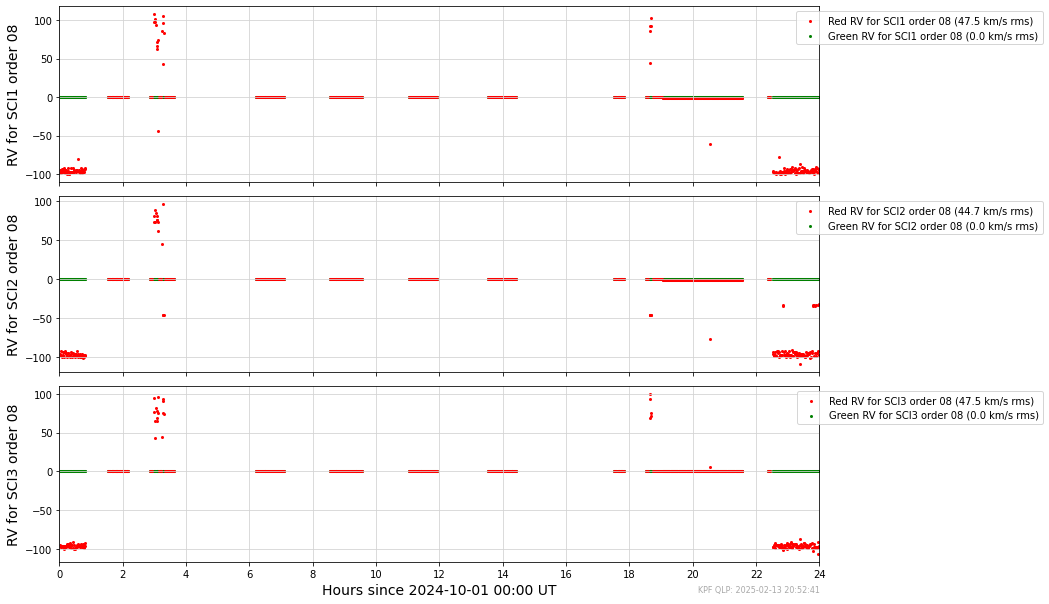

In [17]:
dict1 = {'col': 'RV107', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Green RV for SCI1 order 08', 'marker': '.', 'linewidth': 0.05, 'color': 'green'}}
dict2 = {'col': 'RV142', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Red RV for SCI1 order 08', 'marker': '.', 'linewidth': 0.05, 'color': 'red'}}
dict3 = {'col': 'RV207', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Green RV for SCI2 order 08', 'marker': '.', 'linewidth': 0.05, 'color': 'green'}}
dict4 = {'col': 'RV242', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Red RV for SCI2 order 08', 'marker': '.', 'linewidth': 0.05, 'color': 'red'}}
dict5 = {'col': 'RV307', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Green RV for SCI3 order 08', 'marker': '.', 'linewidth': 0.05, 'color': 'green'}}
dict6 = {'col': 'RV342', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Red RV for SCI3 order 08', 'marker': '.', 'linewidth': 0.05, 'color': 'red'}}
thispanelvars = [dict1, dict2]
thispaneldict = {'ylabel': 'RV for SCI1 order 08',
                 'legend_frac_size': 0.3}
orderletpanel1 = {'panelvars': thispanelvars,
                 'paneldict': thispaneldict}

thispanelvars2 = [dict3, dict4]
thispaneldict2 = {'ylabel': 'RV for SCI2 order 08',
                 'legend_frac_size': 0.3}
orderletpanel2 = {'panelvars': thispanelvars2,
                  'paneldict': thispaneldict2}

thispanelvars3 = [dict5, dict6]
thispaneldict3 = {'ylabel': 'RV for SCI3 order 08',
                 'subtractmedian': 'true',
                 'legend_frac_size': 0.3}
orderletpanel3 = {'panelvars': thispanelvars3,
                  'paneldict': thispaneldict3}

panel_arr = [orderletpanel1, orderletpanel2, orderletpanel3]

plotdict = {
             "description": "Etalon RVs per orderlet",
             "plot_type": "time_series_multipanel",
             "panel_arr": panel_arr
            }

myTS.plot_time_series_multipanel(plotdict, start_date=start_date, end_date=end_date, show_plot=True, clean=True)

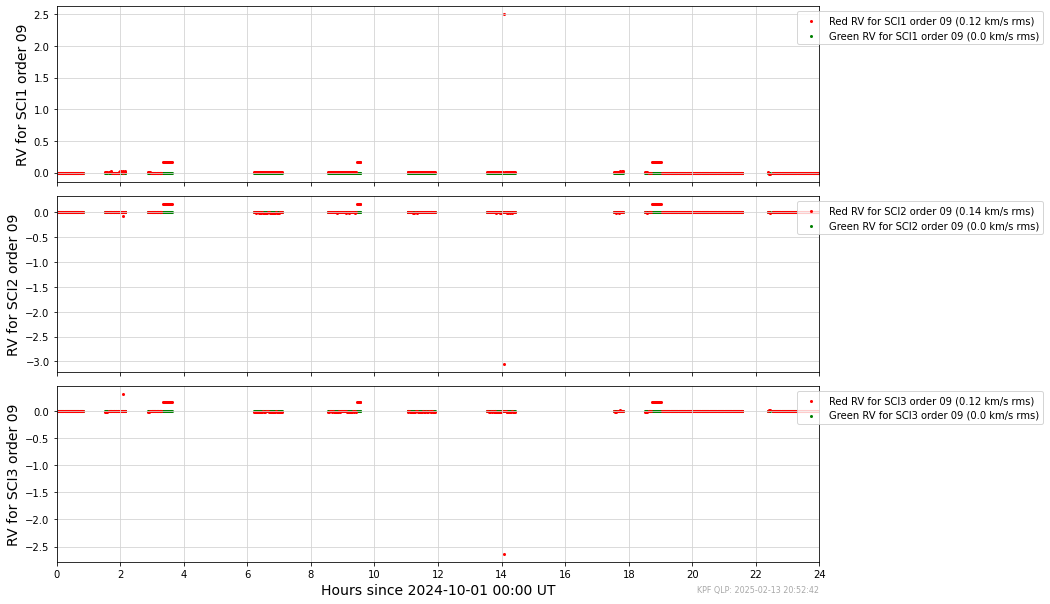

In [18]:
dict1 = {'col': 'RV108', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Green RV for SCI1 order 09', 'marker': '.', 'linewidth': 0.05, 'color': 'green'}}
dict2 = {'col': 'RV143', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Red RV for SCI1 order 09', 'marker': '.', 'linewidth': 0.05, 'color': 'red'}}
dict3 = {'col': 'RV208', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Green RV for SCI2 order 09', 'marker': '.', 'linewidth': 0.05, 'color': 'green'}}
dict4 = {'col': 'RV243', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Red RV for SCI2 order 09', 'marker': '.', 'linewidth': 0.05, 'color': 'red'}}
dict5 = {'col': 'RV308', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Green RV for SCI3 order 09', 'marker': '.', 'linewidth': 0.05, 'color': 'green'}}
dict6 = {'col': 'RV343', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Red RV for SCI3 order 09', 'marker': '.', 'linewidth': 0.05, 'color': 'red'}}
thispanelvars = [dict1, dict2]
thispaneldict = {'ylabel': 'RV for SCI1 order 09',
                 'legend_frac_size': 0.3}
orderletpanel1 = {'panelvars': thispanelvars,
                 'paneldict': thispaneldict}

thispanelvars2 = [dict3, dict4]
thispaneldict2 = {'ylabel': 'RV for SCI2 order 09',
                 'legend_frac_size': 0.3}
orderletpanel2 = {'panelvars': thispanelvars2,
                  'paneldict': thispaneldict2}

thispanelvars3 = [dict5, dict6]
thispaneldict3 = {'ylabel': 'RV for SCI3 order 09',
                 'subtractmedian': 'true',
                 'legend_frac_size': 0.3}
orderletpanel3 = {'panelvars': thispanelvars3,
                  'paneldict': thispaneldict3}

panel_arr = [orderletpanel1, orderletpanel2, orderletpanel3]

plotdict = {
             "description": "Etalon RVs per orderlet",
             "plot_type": "time_series_multipanel",
             "panel_arr": panel_arr
            }

myTS.plot_time_series_multipanel(plotdict, start_date=start_date, end_date=end_date, show_plot=True, clean=True)

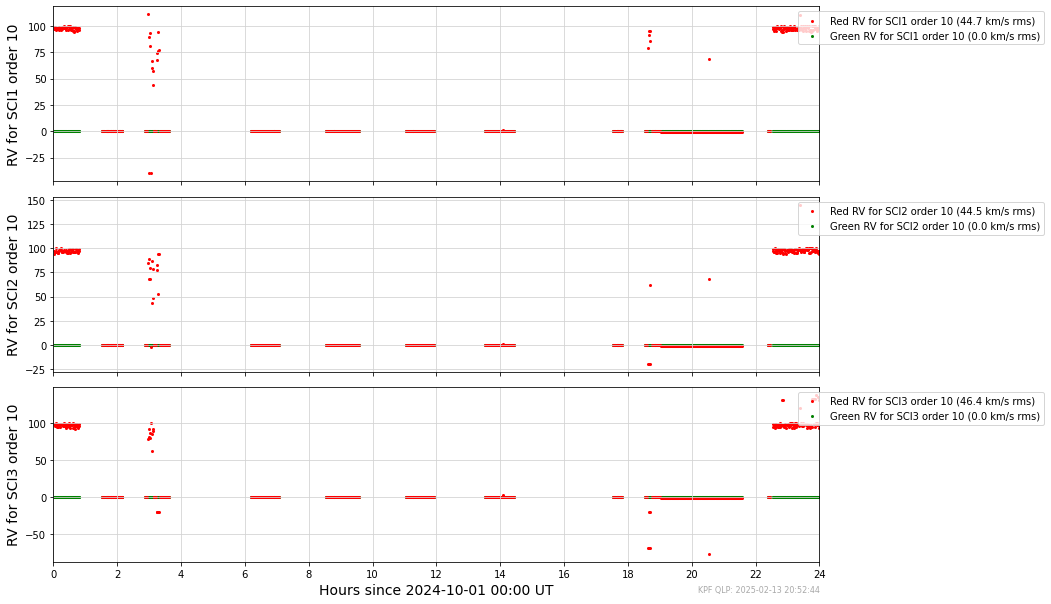

In [19]:
dict1 = {'col': 'RV109', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Green RV for SCI1 order 10', 'marker': '.', 'linewidth': 0.05, 'color': 'green'}}
dict2 = {'col': 'RV144', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Red RV for SCI1 order 10', 'marker': '.', 'linewidth': 0.05, 'color': 'red'}}
dict3 = {'col': 'RV209', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Green RV for SCI2 order 10', 'marker': '.', 'linewidth': 0.05, 'color': 'green'}}
dict4 = {'col': 'RV244', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Red RV for SCI2 order 10', 'marker': '.', 'linewidth': 0.05, 'color': 'red'}}
dict5 = {'col': 'RV309', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Green RV for SCI3 order 10', 'marker': '.', 'linewidth': 0.05, 'color': 'green'}}
dict6 = {'col': 'RV344', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Red RV for SCI3 order 10', 'marker': '.', 'linewidth': 0.05, 'color': 'red'}}
thispanelvars = [dict1, dict2]
thispaneldict = {'ylabel': 'RV for SCI1 order 10',
                 'legend_frac_size': 0.3}
orderletpanel1 = {'panelvars': thispanelvars,
                 'paneldict': thispaneldict}

thispanelvars2 = [dict3, dict4]
thispaneldict2 = {'ylabel': 'RV for SCI2 order 10',
                 'legend_frac_size': 0.3}
orderletpanel2 = {'panelvars': thispanelvars2,
                  'paneldict': thispaneldict2}

thispanelvars3 = [dict5, dict6]
thispaneldict3 = {'ylabel': 'RV for SCI3 order 10',
                 'subtractmedian': 'true',
                 'legend_frac_size': 0.3}
orderletpanel3 = {'panelvars': thispanelvars3,
                  'paneldict': thispaneldict3}

panel_arr = [orderletpanel1, orderletpanel2, orderletpanel3]

plotdict = {
             "description": "Etalon RVs per orderlet",
             "plot_type": "time_series_multipanel",
             "panel_arr": panel_arr
            }

myTS.plot_time_series_multipanel(plotdict, start_date=start_date, end_date=end_date, show_plot=True, clean=True)

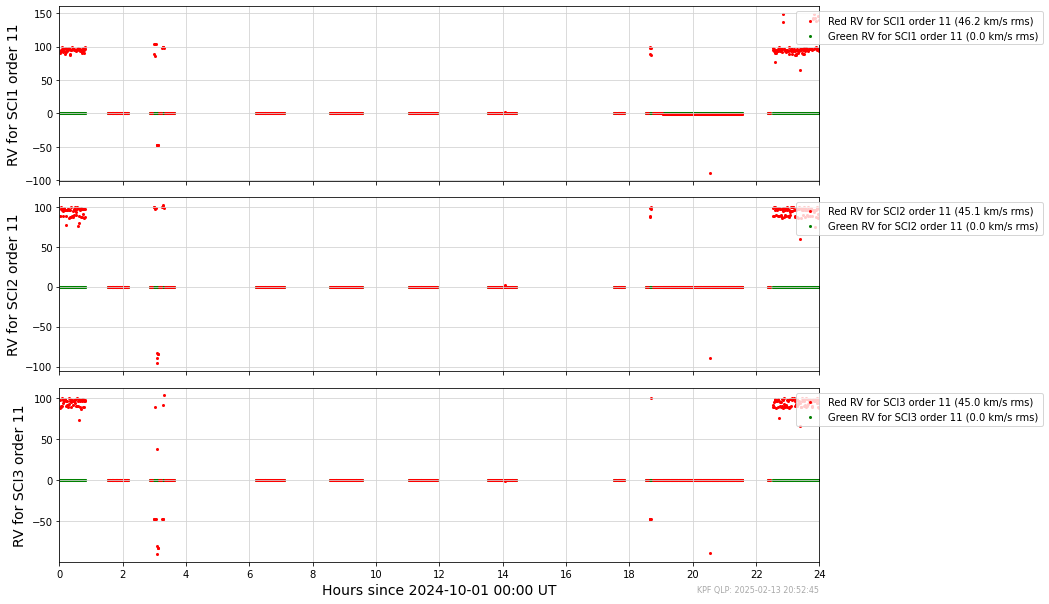

In [20]:
dict1 = {'col': 'RV110', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Green RV for SCI1 order 11', 'marker': '.', 'linewidth': 0.05, 'color': 'green'}}
dict2 = {'col': 'RV145', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Red RV for SCI1 order 11', 'marker': '.', 'linewidth': 0.05, 'color': 'red'}}
dict3 = {'col': 'RV210', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Green RV for SCI2 order 11', 'marker': '.', 'linewidth': 0.05, 'color': 'green'}}
dict4 = {'col': 'RV245', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Red RV for SCI2 order 11', 'marker': '.', 'linewidth': 0.05, 'color': 'red'}}
dict5 = {'col': 'RV310', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Green RV for SCI3 order 11', 'marker': '.', 'linewidth': 0.05, 'color': 'green'}}
dict6 = {'col': 'RV345', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Red RV for SCI3 order 11', 'marker': '.', 'linewidth': 0.05, 'color': 'red'}}
thispanelvars = [dict1, dict2]
thispaneldict = {'ylabel': 'RV for SCI1 order 11',
                 'legend_frac_size': 0.3}
orderletpanel1 = {'panelvars': thispanelvars,
                 'paneldict': thispaneldict}

thispanelvars2 = [dict3, dict4]
thispaneldict2 = {'ylabel': 'RV for SCI2 order 11',
                 'legend_frac_size': 0.3}
orderletpanel2 = {'panelvars': thispanelvars2,
                  'paneldict': thispaneldict2}

thispanelvars3 = [dict5, dict6]
thispaneldict3 = {'ylabel': 'RV for SCI3 order 11',
                 'subtractmedian': 'true',
                 'legend_frac_size': 0.3}
orderletpanel3 = {'panelvars': thispanelvars3,
                  'paneldict': thispaneldict3}

panel_arr = [orderletpanel1, orderletpanel2, orderletpanel3]

plotdict = {
             "description": "Etalon RVs per orderlet",
             "plot_type": "time_series_multipanel",
             "panel_arr": panel_arr
            }

myTS.plot_time_series_multipanel(plotdict, start_date=start_date, end_date=end_date, show_plot=True, clean=True)

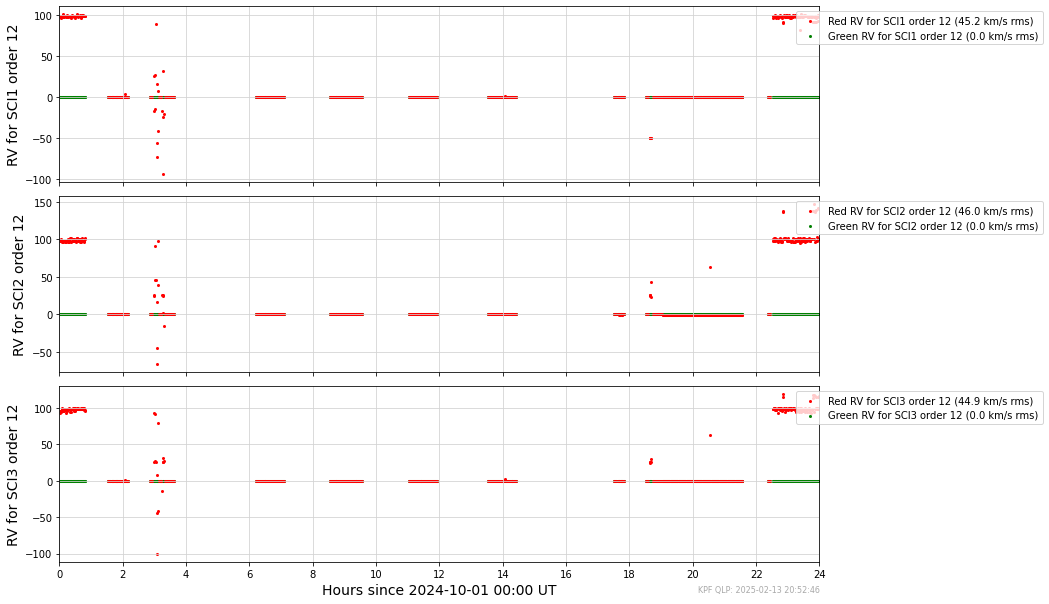

In [21]:
dict1 = {'col': 'RV111', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Green RV for SCI1 order 12', 'marker': '.', 'linewidth': 0.05, 'color': 'green'}}
dict2 = {'col': 'RV146', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Red RV for SCI1 order 12', 'marker': '.', 'linewidth': 0.05, 'color': 'red'}}
dict3 = {'col': 'RV211', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Green RV for SCI2 order 12', 'marker': '.', 'linewidth': 0.05, 'color': 'green'}}
dict4 = {'col': 'RV246', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Red RV for SCI2 order 12', 'marker': '.', 'linewidth': 0.05, 'color': 'red'}}
dict5 = {'col': 'RV311', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Green RV for SCI3 order 12', 'marker': '.', 'linewidth': 0.05, 'color': 'green'}}
dict6 = {'col': 'RV346', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Red RV for SCI3 order 12', 'marker': '.', 'linewidth': 0.05, 'color': 'red'}}
thispanelvars = [dict1, dict2]
thispaneldict = {'ylabel': 'RV for SCI1 order 12',
                 'legend_frac_size': 0.3}
orderletpanel1 = {'panelvars': thispanelvars,
                 'paneldict': thispaneldict}

thispanelvars2 = [dict3, dict4]
thispaneldict2 = {'ylabel': 'RV for SCI2 order 12',
                 'legend_frac_size': 0.3}
orderletpanel2 = {'panelvars': thispanelvars2,
                  'paneldict': thispaneldict2}

thispanelvars3 = [dict5, dict6]
thispaneldict3 = {'ylabel': 'RV for SCI3 order 12',
                 'subtractmedian': 'true',
                 'legend_frac_size': 0.3}
orderletpanel3 = {'panelvars': thispanelvars3,
                  'paneldict': thispaneldict3}

panel_arr = [orderletpanel1, orderletpanel2, orderletpanel3]

plotdict = {
             "description": "Etalon RVs per orderlet",
             "plot_type": "time_series_multipanel",
             "panel_arr": panel_arr
            }

myTS.plot_time_series_multipanel(plotdict, start_date=start_date, end_date=end_date, show_plot=True, clean=True)

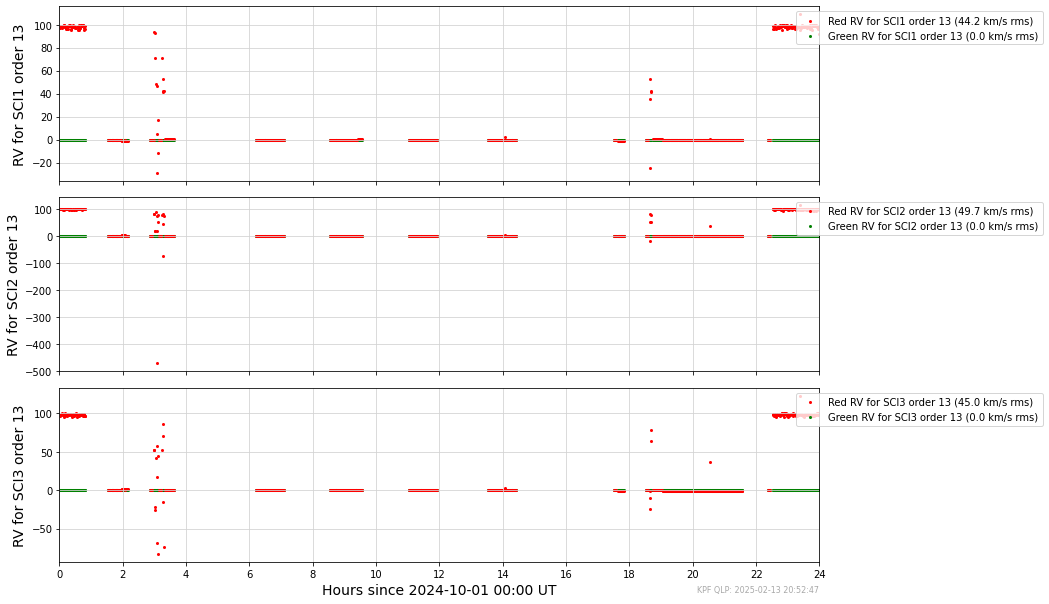

In [22]:
dict1 = {'col': 'RV112', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Green RV for SCI1 order 13', 'marker': '.', 'linewidth': 0.05, 'color': 'green'}}
dict2 = {'col': 'RV147', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Red RV for SCI1 order 13', 'marker': '.', 'linewidth': 0.05, 'color': 'red'}}
dict3 = {'col': 'RV212', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Green RV for SCI2 order 13', 'marker': '.', 'linewidth': 0.05, 'color': 'green'}}
dict4 = {'col': 'RV247', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Red RV for SCI2 order 13', 'marker': '.', 'linewidth': 0.05, 'color': 'red'}}
dict5 = {'col': 'RV312', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Green RV for SCI3 order 13', 'marker': '.', 'linewidth': 0.05, 'color': 'green'}}
dict6 = {'col': 'RV347', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Red RV for SCI3 order 13', 'marker': '.', 'linewidth': 0.05, 'color': 'red'}}
thispanelvars = [dict1, dict2]
thispaneldict = {'ylabel': 'RV for SCI1 order 13',
                 'legend_frac_size': 0.3}
orderletpanel1 = {'panelvars': thispanelvars,
                 'paneldict': thispaneldict}

thispanelvars2 = [dict3, dict4]
thispaneldict2 = {'ylabel': 'RV for SCI2 order 13',
                 'legend_frac_size': 0.3}
orderletpanel2 = {'panelvars': thispanelvars2,
                  'paneldict': thispaneldict2}

thispanelvars3 = [dict5, dict6]
thispaneldict3 = {'ylabel': 'RV for SCI3 order 13',
                 'subtractmedian': 'true',
                 'legend_frac_size': 0.3}
orderletpanel3 = {'panelvars': thispanelvars3,
                  'paneldict': thispaneldict3}

panel_arr = [orderletpanel1, orderletpanel2, orderletpanel3]

plotdict = {
             "description": "Etalon RVs per orderlet",
             "plot_type": "time_series_multipanel",
             "panel_arr": panel_arr
            }

myTS.plot_time_series_multipanel(plotdict, start_date=start_date, end_date=end_date, show_plot=True, clean=True)

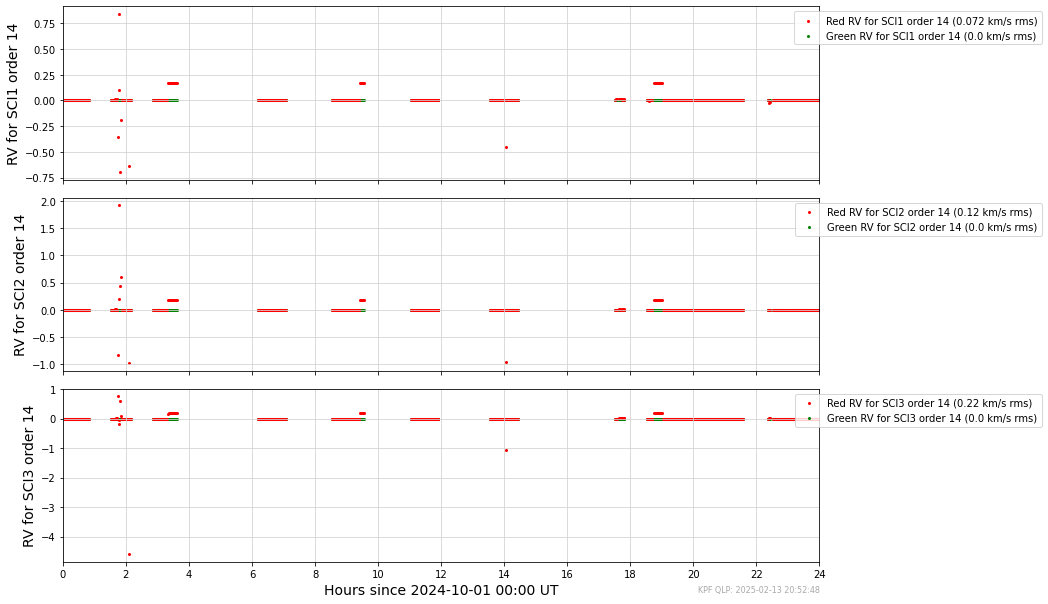

In [23]:
dict1 = {'col': 'RV113', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Green RV for SCI1 order 14', 'marker': '.', 'linewidth': 0.05, 'color': 'green'}}
dict2 = {'col': 'RV148', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Red RV for SCI1 order 14', 'marker': '.', 'linewidth': 0.05, 'color': 'red'}}
dict3 = {'col': 'RV213', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Green RV for SCI2 order 14', 'marker': '.', 'linewidth': 0.05, 'color': 'green'}}
dict4 = {'col': 'RV248', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Red RV for SCI2 order 14', 'marker': '.', 'linewidth': 0.05, 'color': 'red'}}
dict5 = {'col': 'RV313', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Green RV for SCI3 order 14', 'marker': '.', 'linewidth': 0.05, 'color': 'green'}}
dict6 = {'col': 'RV348', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Red RV for SCI3 order 14', 'marker': '.', 'linewidth': 0.05, 'color': 'red'}}
thispanelvars = [dict1, dict2]
thispaneldict = {'ylabel': 'RV for SCI1 order 14',
                 'legend_frac_size': 0.3}
orderletpanel1 = {'panelvars': thispanelvars,
                 'paneldict': thispaneldict}

thispanelvars2 = [dict3, dict4]
thispaneldict2 = {'ylabel': 'RV for SCI2 order 14',
                 'legend_frac_size': 0.3}
orderletpanel2 = {'panelvars': thispanelvars2,
                  'paneldict': thispaneldict2}

thispanelvars3 = [dict5, dict6]
thispaneldict3 = {'ylabel': 'RV for SCI3 order 14',
                 'subtractmedian': 'true',
                 'legend_frac_size': 0.3}
orderletpanel3 = {'panelvars': thispanelvars3,
                  'paneldict': thispaneldict3}

panel_arr = [orderletpanel1, orderletpanel2, orderletpanel3]

plotdict = {
             "description": "Etalon RVs per orderlet",
             "plot_type": "time_series_multipanel",
             "panel_arr": panel_arr
            }

myTS.plot_time_series_multipanel(plotdict, start_date=start_date, end_date=end_date, show_plot=True, clean=True)

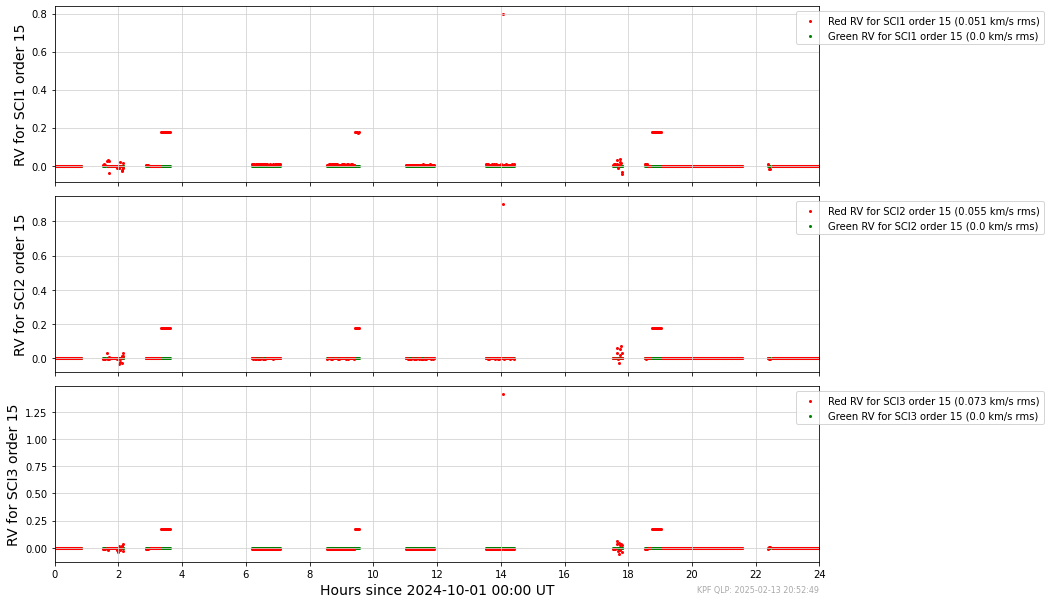

In [24]:
dict1 = {'col': 'RV114', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Green RV for SCI1 order 15', 'marker': '.', 'linewidth': 0.05, 'color': 'green'}}
dict2 = {'col': 'RV149', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Red RV for SCI1 order 15', 'marker': '.', 'linewidth': 0.05, 'color': 'red'}}
dict3 = {'col': 'RV214', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Green RV for SCI2 order 15', 'marker': '.', 'linewidth': 0.05, 'color': 'green'}}
dict4 = {'col': 'RV249', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Red RV for SCI2 order 15', 'marker': '.', 'linewidth': 0.05, 'color': 'red'}}
dict5 = {'col': 'RV314', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Green RV for SCI3 order 15', 'marker': '.', 'linewidth': 0.05, 'color': 'green'}}
dict6 = {'col': 'RV349', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Red RV for SCI3 order 15', 'marker': '.', 'linewidth': 0.05, 'color': 'red'}}
thispanelvars = [dict1, dict2]
thispaneldict = {'ylabel': 'RV for SCI1 order 15',
                 'legend_frac_size': 0.3}
orderletpanel1 = {'panelvars': thispanelvars,
                 'paneldict': thispaneldict}

thispanelvars2 = [dict3, dict4]
thispaneldict2 = {'ylabel': 'RV for SCI2 order 15',
                 'legend_frac_size': 0.3}
orderletpanel2 = {'panelvars': thispanelvars2,
                  'paneldict': thispaneldict2}

thispanelvars3 = [dict5, dict6]
thispaneldict3 = {'ylabel': 'RV for SCI3 order 15',
                 'subtractmedian': 'true',
                 'legend_frac_size': 0.3}
orderletpanel3 = {'panelvars': thispanelvars3,
                  'paneldict': thispaneldict3}

panel_arr = [orderletpanel1, orderletpanel2, orderletpanel3]

plotdict = {
             "description": "Etalon RVs per orderlet",
             "plot_type": "time_series_multipanel",
             "panel_arr": panel_arr
            }

myTS.plot_time_series_multipanel(plotdict, start_date=start_date, end_date=end_date, show_plot=True, clean=True)

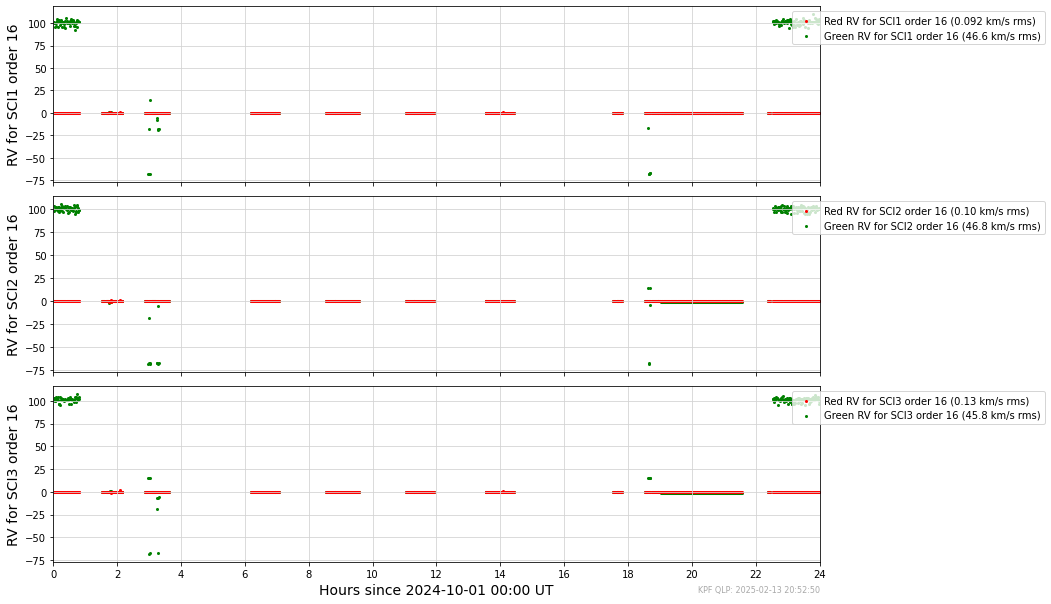

In [25]:
dict1 = {'col': 'RV115', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Green RV for SCI1 order 16', 'marker': '.', 'linewidth': 0.05, 'color': 'green'}}
dict2 = {'col': 'RV150', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Red RV for SCI1 order 16', 'marker': '.', 'linewidth': 0.05, 'color': 'red'}}
dict3 = {'col': 'RV215', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Green RV for SCI2 order 16', 'marker': '.', 'linewidth': 0.05, 'color': 'green'}}
dict4 = {'col': 'RV250', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Red RV for SCI2 order 16', 'marker': '.', 'linewidth': 0.05, 'color': 'red'}}
dict5 = {'col': 'RV315', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Green RV for SCI3 order 16', 'marker': '.', 'linewidth': 0.05, 'color': 'green'}}
dict6 = {'col': 'RV350', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Red RV for SCI3 order 16', 'marker': '.', 'linewidth': 0.05, 'color': 'red'}}
thispanelvars = [dict1, dict2]
thispaneldict = {'ylabel': 'RV for SCI1 order 16',
                 'legend_frac_size': 0.3}
orderletpanel1 = {'panelvars': thispanelvars,
                 'paneldict': thispaneldict}

thispanelvars2 = [dict3, dict4]
thispaneldict2 = {'ylabel': 'RV for SCI2 order 16',
                 'legend_frac_size': 0.3}
orderletpanel2 = {'panelvars': thispanelvars2,
                  'paneldict': thispaneldict2}

thispanelvars3 = [dict5, dict6]
thispaneldict3 = {'ylabel': 'RV for SCI3 order 16',
                 'subtractmedian': 'true',
                 'legend_frac_size': 0.3}
orderletpanel3 = {'panelvars': thispanelvars3,
                  'paneldict': thispaneldict3}

panel_arr = [orderletpanel1, orderletpanel2, orderletpanel3]

plotdict = {
             "description": "Etalon RVs per orderlet",
             "plot_type": "time_series_multipanel",
             "panel_arr": panel_arr
            }

myTS.plot_time_series_multipanel(plotdict, start_date=start_date, end_date=end_date, show_plot=True, clean=True)

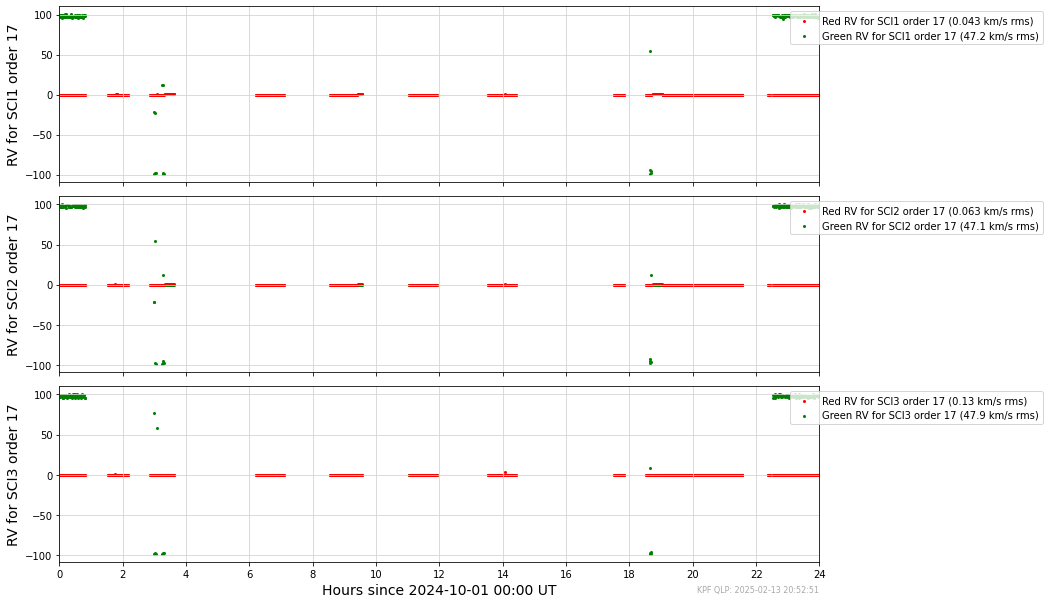

In [26]:
dict1 = {'col': 'RV116', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Green RV for SCI1 order 17', 'marker': '.', 'linewidth': 0.05, 'color': 'green'}}
dict2 = {'col': 'RV151', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Red RV for SCI1 order 17', 'marker': '.', 'linewidth': 0.05, 'color': 'red'}}
dict3 = {'col': 'RV216', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Green RV for SCI2 order 17', 'marker': '.', 'linewidth': 0.05, 'color': 'green'}}
dict4 = {'col': 'RV251', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Red RV for SCI2 order 17', 'marker': '.', 'linewidth': 0.05, 'color': 'red'}}
dict5 = {'col': 'RV316', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Green RV for SCI3 order 17', 'marker': '.', 'linewidth': 0.05, 'color': 'green'}}
dict6 = {'col': 'RV351', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Red RV for SCI3 order 17', 'marker': '.', 'linewidth': 0.05, 'color': 'red'}}
thispanelvars = [dict1, dict2]
thispaneldict = {'ylabel': 'RV for SCI1 order 17',
                 'legend_frac_size': 0.3}
orderletpanel1 = {'panelvars': thispanelvars,
                 'paneldict': thispaneldict}

thispanelvars2 = [dict3, dict4]
thispaneldict2 = {'ylabel': 'RV for SCI2 order 17',
                 'legend_frac_size': 0.3}
orderletpanel2 = {'panelvars': thispanelvars2,
                  'paneldict': thispaneldict2}

thispanelvars3 = [dict5, dict6]
thispaneldict3 = {'ylabel': 'RV for SCI3 order 17',
                 'subtractmedian': 'true',
                 'legend_frac_size': 0.3}
orderletpanel3 = {'panelvars': thispanelvars3,
                  'paneldict': thispaneldict3}

panel_arr = [orderletpanel1, orderletpanel2, orderletpanel3]

plotdict = {
             "description": "Etalon RVs per orderlet",
             "plot_type": "time_series_multipanel",
             "panel_arr": panel_arr
            }

myTS.plot_time_series_multipanel(plotdict, start_date=start_date, end_date=end_date, show_plot=True, clean=True)

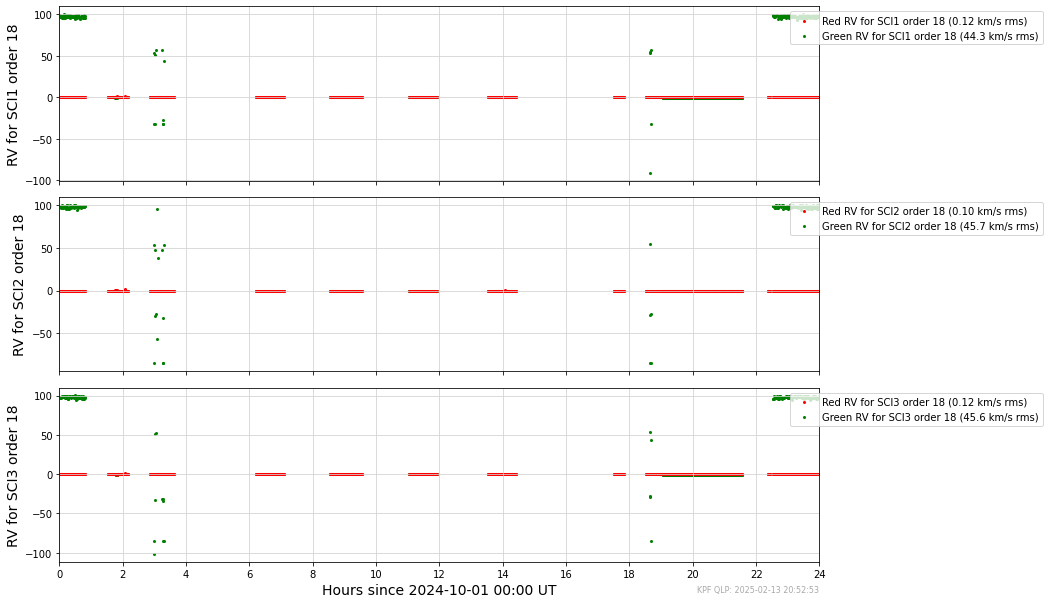

In [27]:
dict1 = {'col': 'RV117', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Green RV for SCI1 order 18', 'marker': '.', 'linewidth': 0.05, 'color': 'green'}}
dict2 = {'col': 'RV152', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Red RV for SCI1 order 18', 'marker': '.', 'linewidth': 0.05, 'color': 'red'}}
dict3 = {'col': 'RV217', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Green RV for SCI2 order 18', 'marker': '.', 'linewidth': 0.05, 'color': 'green'}}
dict4 = {'col': 'RV252', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Red RV for SCI2 order 18', 'marker': '.', 'linewidth': 0.05, 'color': 'red'}}
dict5 = {'col': 'RV317', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Green RV for SCI3 order 18', 'marker': '.', 'linewidth': 0.05, 'color': 'green'}}
dict6 = {'col': 'RV352', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Red RV for SCI3 order 18', 'marker': '.', 'linewidth': 0.05, 'color': 'red'}}
thispanelvars = [dict1, dict2]
thispaneldict = {'ylabel': 'RV for SCI1 order 18',
                 'legend_frac_size': 0.3}
orderletpanel1 = {'panelvars': thispanelvars,
                 'paneldict': thispaneldict}

thispanelvars2 = [dict3, dict4]
thispaneldict2 = {'ylabel': 'RV for SCI2 order 18',
                 'legend_frac_size': 0.3}
orderletpanel2 = {'panelvars': thispanelvars2,
                  'paneldict': thispaneldict2}

thispanelvars3 = [dict5, dict6]
thispaneldict3 = {'ylabel': 'RV for SCI3 order 18',
                 'subtractmedian': 'true',
                 'legend_frac_size': 0.3}
orderletpanel3 = {'panelvars': thispanelvars3,
                  'paneldict': thispaneldict3}

panel_arr = [orderletpanel1, orderletpanel2, orderletpanel3]

plotdict = {
             "description": "Etalon RVs per orderlet",
             "plot_type": "time_series_multipanel",
             "panel_arr": panel_arr
            }

myTS.plot_time_series_multipanel(plotdict, start_date=start_date, end_date=end_date, show_plot=True, clean=True)

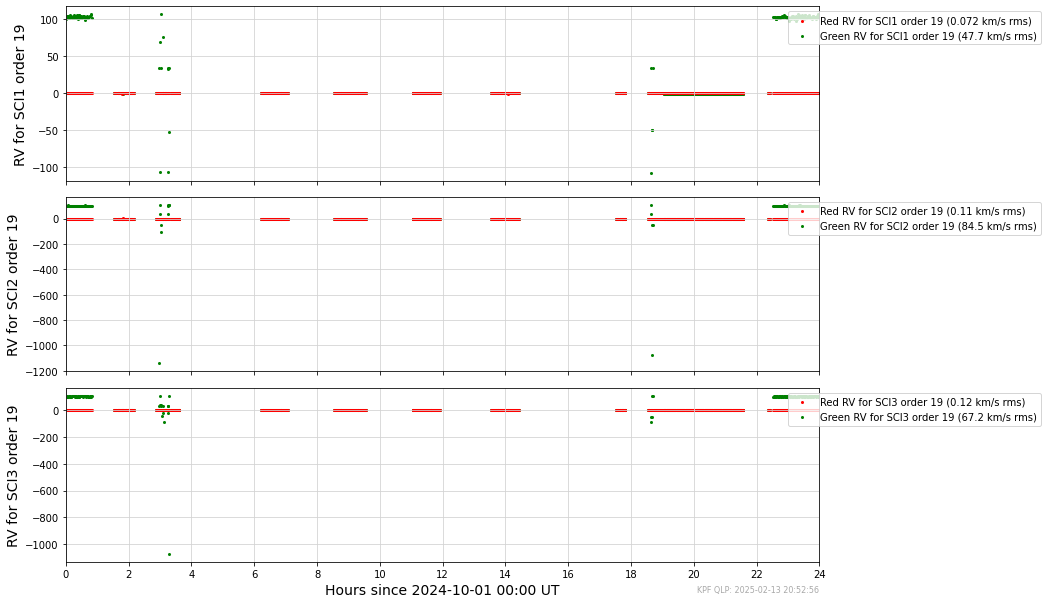

In [28]:
dict1 = {'col': 'RV118', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Green RV for SCI1 order 19', 'marker': '.', 'linewidth': 0.05, 'color': 'green'}}
dict2 = {'col': 'RV153', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Red RV for SCI1 order 19', 'marker': '.', 'linewidth': 0.05, 'color': 'red'}}
dict3 = {'col': 'RV218', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Green RV for SCI2 order 19', 'marker': '.', 'linewidth': 0.05, 'color': 'green'}}
dict4 = {'col': 'RV253', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Red RV for SCI2 order 19', 'marker': '.', 'linewidth': 0.05, 'color': 'red'}}
dict5 = {'col': 'RV318', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Green RV for SCI3 order 19', 'marker': '.', 'linewidth': 0.05, 'color': 'green'}}
dict6 = {'col': 'RV353', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Red RV for SCI3 order 19', 'marker': '.', 'linewidth': 0.05, 'color': 'red'}}
thispanelvars = [dict1, dict2]
thispaneldict = {'ylabel': 'RV for SCI1 order 19',
                 'legend_frac_size': 0.3}
orderletpanel1 = {'panelvars': thispanelvars,
                 'paneldict': thispaneldict}

thispanelvars2 = [dict3, dict4]
thispaneldict2 = {'ylabel': 'RV for SCI2 order 19',
                 'legend_frac_size': 0.3}
orderletpanel2 = {'panelvars': thispanelvars2,
                  'paneldict': thispaneldict2}

thispanelvars3 = [dict5, dict6]
thispaneldict3 = {'ylabel': 'RV for SCI3 order 19',
                 'subtractmedian': 'true',
                 'legend_frac_size': 0.3}
orderletpanel3 = {'panelvars': thispanelvars3,
                  'paneldict': thispaneldict3}

panel_arr = [orderletpanel1, orderletpanel2, orderletpanel3]

plotdict = {
             "description": "Etalon RVs per orderlet",
             "plot_type": "time_series_multipanel",
             "panel_arr": panel_arr
            }

myTS.plot_time_series_multipanel(plotdict, start_date=start_date, end_date=end_date, show_plot=True, clean=True)

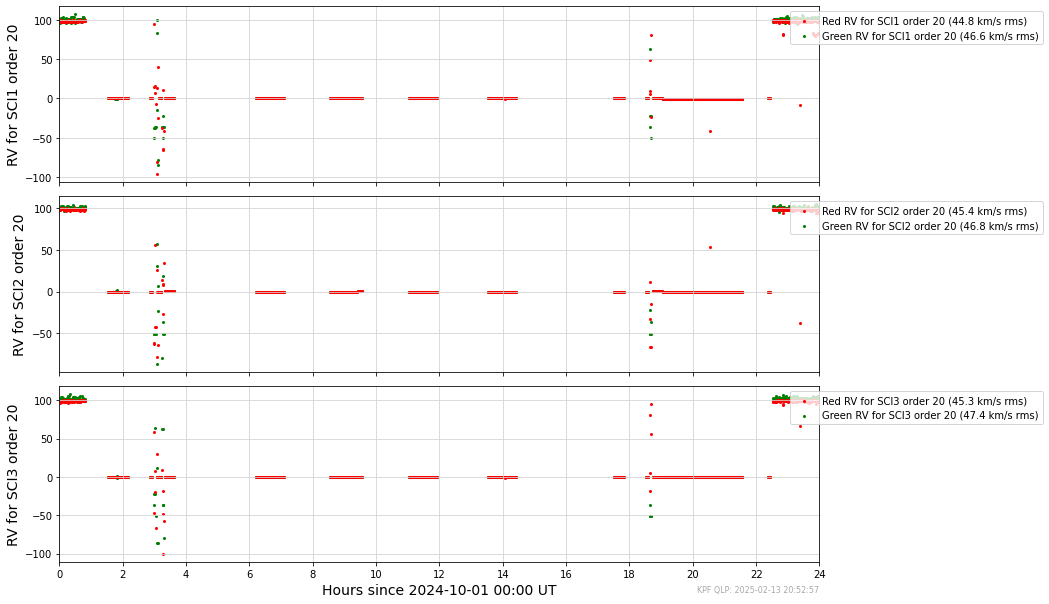

In [29]:
dict1 = {'col': 'RV119', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Green RV for SCI1 order 20', 'marker': '.', 'linewidth': 0.05, 'color': 'green'}}
dict2 = {'col': 'RV154', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Red RV for SCI1 order 20', 'marker': '.', 'linewidth': 0.05, 'color': 'red'}}
dict3 = {'col': 'RV219', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Green RV for SCI2 order 20', 'marker': '.', 'linewidth': 0.05, 'color': 'green'}}
dict4 = {'col': 'RV254', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Red RV for SCI2 order 20', 'marker': '.', 'linewidth': 0.05, 'color': 'red'}}
dict5 = {'col': 'RV319', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Green RV for SCI3 order 20', 'marker': '.', 'linewidth': 0.05, 'color': 'green'}}
dict6 = {'col': 'RV354', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Red RV for SCI3 order 20', 'marker': '.', 'linewidth': 0.05, 'color': 'red'}}
thispanelvars = [dict1, dict2]
thispaneldict = {'ylabel': 'RV for SCI1 order 20',
                 'legend_frac_size': 0.3}
orderletpanel1 = {'panelvars': thispanelvars,
                 'paneldict': thispaneldict}

thispanelvars2 = [dict3, dict4]
thispaneldict2 = {'ylabel': 'RV for SCI2 order 20',
                 'legend_frac_size': 0.3}
orderletpanel2 = {'panelvars': thispanelvars2,
                  'paneldict': thispaneldict2}

thispanelvars3 = [dict5, dict6]
thispaneldict3 = {'ylabel': 'RV for SCI3 order 20',
                 'subtractmedian': 'true',
                 'legend_frac_size': 0.3}
orderletpanel3 = {'panelvars': thispanelvars3,
                  'paneldict': thispaneldict3}

panel_arr = [orderletpanel1, orderletpanel2, orderletpanel3]

plotdict = {
             "description": "Etalon RVs per orderlet",
             "plot_type": "time_series_multipanel",
             "panel_arr": panel_arr
            }

myTS.plot_time_series_multipanel(plotdict, start_date=start_date, end_date=end_date, show_plot=True, clean=True)

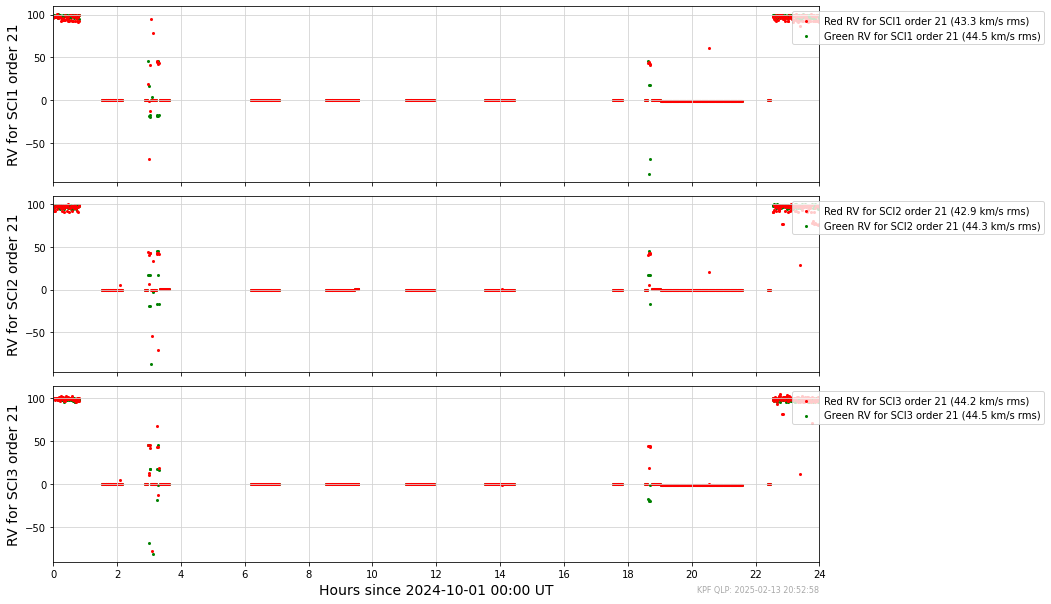

In [30]:
dict1 = {'col': 'RV120', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Green RV for SCI1 order 21', 'marker': '.', 'linewidth': 0.05, 'color': 'green'}}
dict2 = {'col': 'RV155', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Red RV for SCI1 order 21', 'marker': '.', 'linewidth': 0.05, 'color': 'red'}}
dict3 = {'col': 'RV220', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Green RV for SCI2 order 21', 'marker': '.', 'linewidth': 0.05, 'color': 'green'}}
dict4 = {'col': 'RV255', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Red RV for SCI2 order 21', 'marker': '.', 'linewidth': 0.05, 'color': 'red'}}
dict5 = {'col': 'RV320', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Green RV for SCI3 order 21', 'marker': '.', 'linewidth': 0.05, 'color': 'green'}}
dict6 = {'col': 'RV355', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Red RV for SCI3 order 21', 'marker': '.', 'linewidth': 0.05, 'color': 'red'}}
thispanelvars = [dict1, dict2]
thispaneldict = {'ylabel': 'RV for SCI1 order 21',
                 'legend_frac_size': 0.3}
orderletpanel1 = {'panelvars': thispanelvars,
                 'paneldict': thispaneldict}

thispanelvars2 = [dict3, dict4]
thispaneldict2 = {'ylabel': 'RV for SCI2 order 21',
                 'legend_frac_size': 0.3}
orderletpanel2 = {'panelvars': thispanelvars2,
                  'paneldict': thispaneldict2}

thispanelvars3 = [dict5, dict6]
thispaneldict3 = {'ylabel': 'RV for SCI3 order 21',
                 'subtractmedian': 'true',
                 'legend_frac_size': 0.3}
orderletpanel3 = {'panelvars': thispanelvars3,
                  'paneldict': thispaneldict3}

panel_arr = [orderletpanel1, orderletpanel2, orderletpanel3]

plotdict = {
             "description": "Etalon RVs per orderlet",
             "plot_type": "time_series_multipanel",
             "panel_arr": panel_arr
            }

myTS.plot_time_series_multipanel(plotdict, start_date=start_date, end_date=end_date, show_plot=True, clean=True)

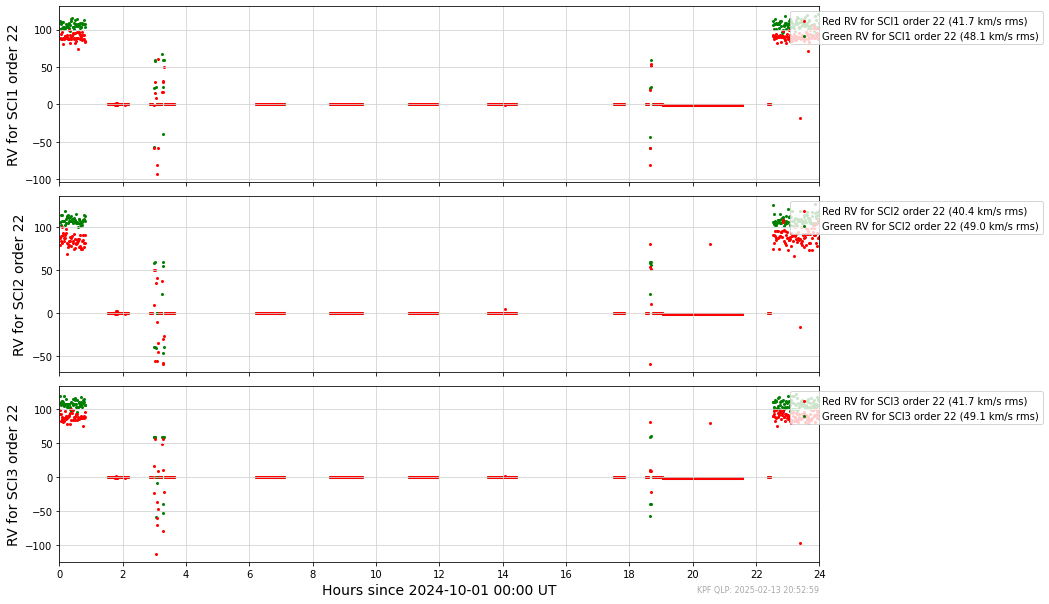

In [31]:
dict1 = {'col': 'RV121', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Green RV for SCI1 order 22', 'marker': '.', 'linewidth': 0.05, 'color': 'green'}}
dict2 = {'col': 'RV156', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Red RV for SCI1 order 22', 'marker': '.', 'linewidth': 0.05, 'color': 'red'}}
dict3 = {'col': 'RV221', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Green RV for SCI2 order 22', 'marker': '.', 'linewidth': 0.05, 'color': 'green'}}
dict4 = {'col': 'RV256', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Red RV for SCI2 order 22', 'marker': '.', 'linewidth': 0.05, 'color': 'red'}}
dict5 = {'col': 'RV321', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Green RV for SCI3 order 22', 'marker': '.', 'linewidth': 0.05, 'color': 'green'}}
dict6 = {'col': 'RV356', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Red RV for SCI3 order 22', 'marker': '.', 'linewidth': 0.05, 'color': 'red'}}
thispanelvars = [dict1, dict2]
thispaneldict = {'ylabel': 'RV for SCI1 order 22',
                 'legend_frac_size': 0.3}
orderletpanel1 = {'panelvars': thispanelvars,
                 'paneldict': thispaneldict}

thispanelvars2 = [dict3, dict4]
thispaneldict2 = {'ylabel': 'RV for SCI2 order 22',
                 'legend_frac_size': 0.3}
orderletpanel2 = {'panelvars': thispanelvars2,
                  'paneldict': thispaneldict2}

thispanelvars3 = [dict5, dict6]
thispaneldict3 = {'ylabel': 'RV for SCI3 order 22',
                 'subtractmedian': 'true',
                 'legend_frac_size': 0.3}
orderletpanel3 = {'panelvars': thispanelvars3,
                  'paneldict': thispaneldict3}

panel_arr = [orderletpanel1, orderletpanel2, orderletpanel3]

plotdict = {
             "description": "Etalon RVs per orderlet",
             "plot_type": "time_series_multipanel",
             "panel_arr": panel_arr
            }

myTS.plot_time_series_multipanel(plotdict, start_date=start_date, end_date=end_date, show_plot=True, clean=True)

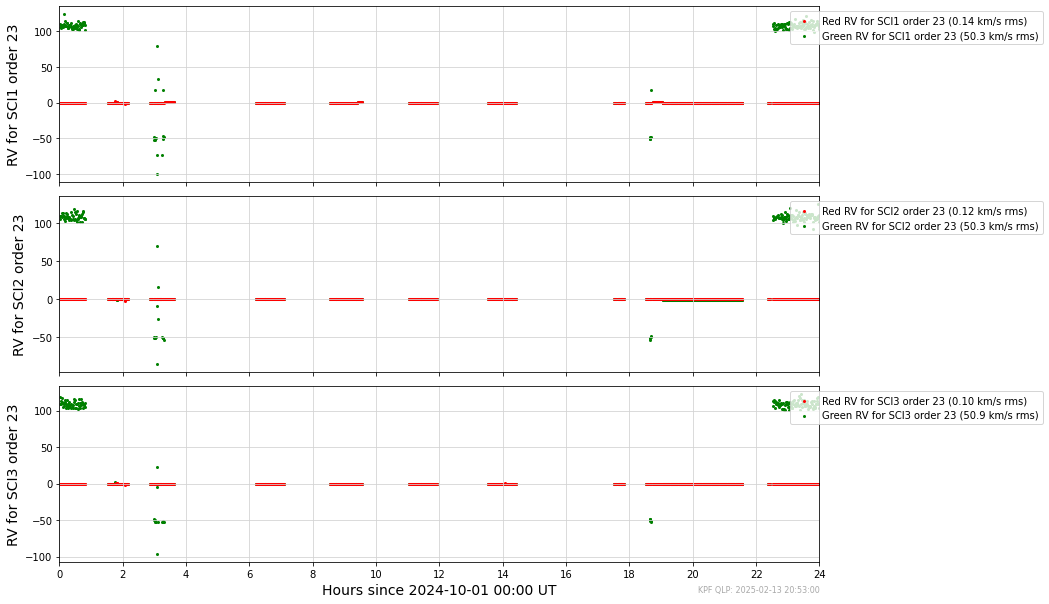

In [32]:
dict1 = {'col': 'RV122', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Green RV for SCI1 order 23', 'marker': '.', 'linewidth': 0.05, 'color': 'green'}}
dict2 = {'col': 'RV157', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Red RV for SCI1 order 23', 'marker': '.', 'linewidth': 0.05, 'color': 'red'}}
dict3 = {'col': 'RV222', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Green RV for SCI2 order 23', 'marker': '.', 'linewidth': 0.05, 'color': 'green'}}
dict4 = {'col': 'RV257', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Red RV for SCI2 order 23', 'marker': '.', 'linewidth': 0.05, 'color': 'red'}}
dict5 = {'col': 'RV322', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Green RV for SCI3 order 23', 'marker': '.', 'linewidth': 0.05, 'color': 'green'}}
dict6 = {'col': 'RV357', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Red RV for SCI3 order 23', 'marker': '.', 'linewidth': 0.05, 'color': 'red'}}
thispanelvars = [dict1, dict2]
thispaneldict = {'ylabel': 'RV for SCI1 order 23',
                 'legend_frac_size': 0.3}
orderletpanel1 = {'panelvars': thispanelvars,
                 'paneldict': thispaneldict}

thispanelvars2 = [dict3, dict4]
thispaneldict2 = {'ylabel': 'RV for SCI2 order 23',
                 'legend_frac_size': 0.3}
orderletpanel2 = {'panelvars': thispanelvars2,
                  'paneldict': thispaneldict2}

thispanelvars3 = [dict5, dict6]
thispaneldict3 = {'ylabel': 'RV for SCI3 order 23',
                 'subtractmedian': 'true',
                 'legend_frac_size': 0.3}
orderletpanel3 = {'panelvars': thispanelvars3,
                  'paneldict': thispaneldict3}

panel_arr = [orderletpanel1, orderletpanel2, orderletpanel3]

plotdict = {
             "description": "Etalon RVs per orderlet",
             "plot_type": "time_series_multipanel",
             "panel_arr": panel_arr
            }

myTS.plot_time_series_multipanel(plotdict, start_date=start_date, end_date=end_date, show_plot=True, clean=True)

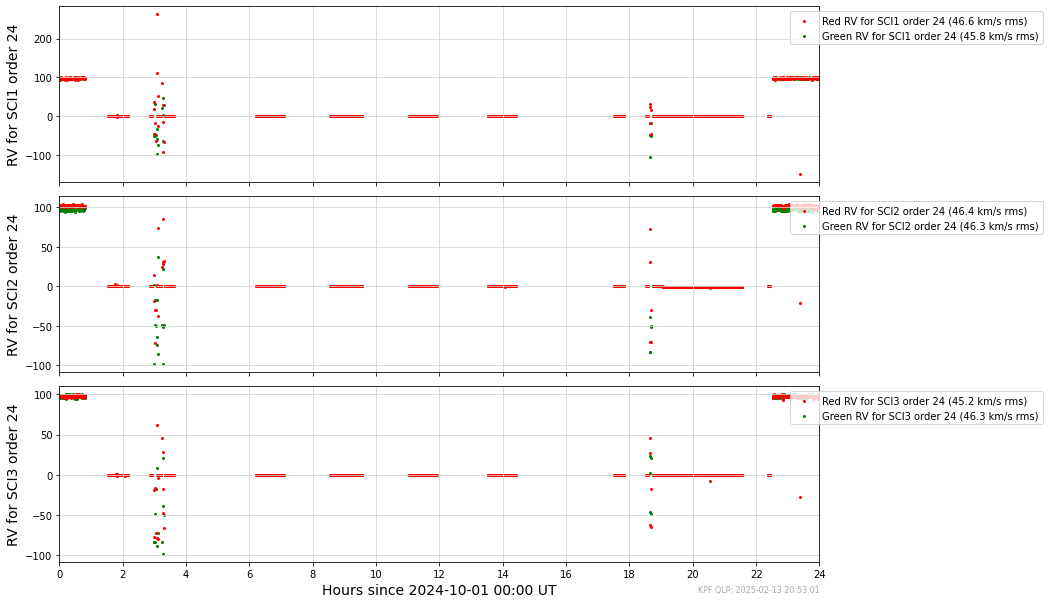

In [33]:
dict1 = {'col': 'RV123', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Green RV for SCI1 order 24', 'marker': '.', 'linewidth': 0.05, 'color': 'green'}}
dict2 = {'col': 'RV158', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Red RV for SCI1 order 24', 'marker': '.', 'linewidth': 0.05, 'color': 'red'}}
dict3 = {'col': 'RV223', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Green RV for SCI2 order 24', 'marker': '.', 'linewidth': 0.05, 'color': 'green'}}
dict4 = {'col': 'RV258', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Red RV for SCI2 order 24', 'marker': '.', 'linewidth': 0.05, 'color': 'red'}}
dict5 = {'col': 'RV323', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Green RV for SCI3 order 24', 'marker': '.', 'linewidth': 0.05, 'color': 'green'}}
dict6 = {'col': 'RV358', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Red RV for SCI3 order 24', 'marker': '.', 'linewidth': 0.05, 'color': 'red'}}
thispanelvars = [dict1, dict2]
thispaneldict = {'ylabel': 'RV for SCI1 order 24',
                 'legend_frac_size': 0.3}
orderletpanel1 = {'panelvars': thispanelvars,
                 'paneldict': thispaneldict}

thispanelvars2 = [dict3, dict4]
thispaneldict2 = {'ylabel': 'RV for SCI2 order 24',
                 'legend_frac_size': 0.3}
orderletpanel2 = {'panelvars': thispanelvars2,
                  'paneldict': thispaneldict2}

thispanelvars3 = [dict5, dict6]
thispaneldict3 = {'ylabel': 'RV for SCI3 order 24',
                 'subtractmedian': 'true',
                 'legend_frac_size': 0.3}
orderletpanel3 = {'panelvars': thispanelvars3,
                  'paneldict': thispaneldict3}

panel_arr = [orderletpanel1, orderletpanel2, orderletpanel3]

plotdict = {
             "description": "Etalon RVs per orderlet",
             "plot_type": "time_series_multipanel",
             "panel_arr": panel_arr
            }

myTS.plot_time_series_multipanel(plotdict, start_date=start_date, end_date=end_date, show_plot=True, clean=True)

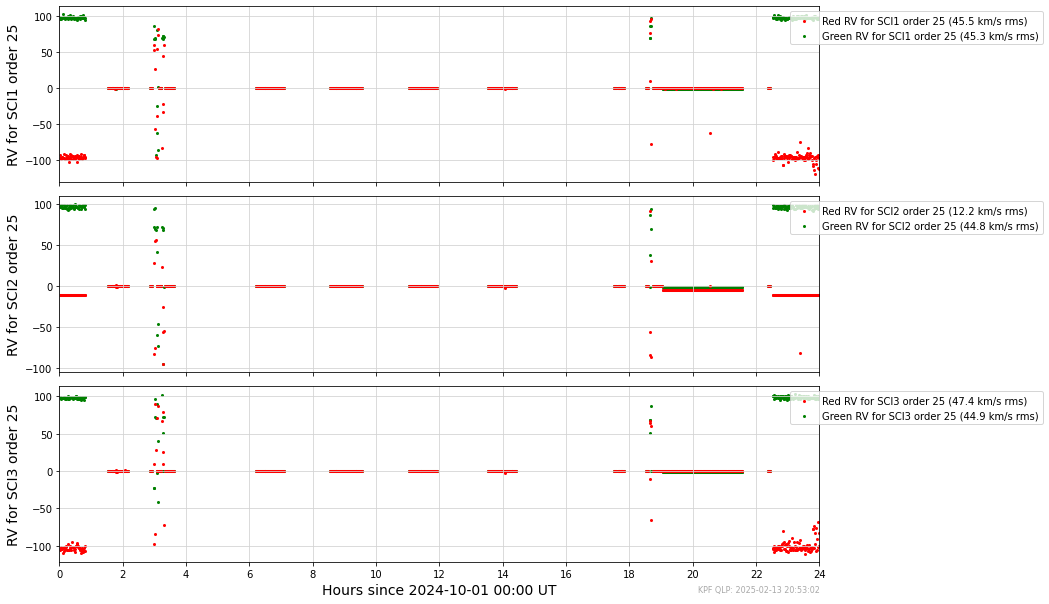

In [34]:
dict1 = {'col': 'RV124', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Green RV for SCI1 order 25', 'marker': '.', 'linewidth': 0.05, 'color': 'green'}}
dict2 = {'col': 'RV159', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Red RV for SCI1 order 25', 'marker': '.', 'linewidth': 0.05, 'color': 'red'}}
dict3 = {'col': 'RV224', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Green RV for SCI2 order 25', 'marker': '.', 'linewidth': 0.05, 'color': 'green'}}
dict4 = {'col': 'RV259', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Red RV for SCI2 order 25', 'marker': '.', 'linewidth': 0.05, 'color': 'red'}}
dict5 = {'col': 'RV324', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Green RV for SCI3 order 25', 'marker': '.', 'linewidth': 0.05, 'color': 'green'}}
dict6 = {'col': 'RV359', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Red RV for SCI3 order 25', 'marker': '.', 'linewidth': 0.05, 'color': 'red'}}
thispanelvars = [dict1, dict2]
thispaneldict = {'ylabel': 'RV for SCI1 order 25',
                 'legend_frac_size': 0.3}
orderletpanel1 = {'panelvars': thispanelvars,
                 'paneldict': thispaneldict}

thispanelvars2 = [dict3, dict4]
thispaneldict2 = {'ylabel': 'RV for SCI2 order 25',
                 'legend_frac_size': 0.3}
orderletpanel2 = {'panelvars': thispanelvars2,
                  'paneldict': thispaneldict2}

thispanelvars3 = [dict5, dict6]
thispaneldict3 = {'ylabel': 'RV for SCI3 order 25',
                 'subtractmedian': 'true',
                 'legend_frac_size': 0.3}
orderletpanel3 = {'panelvars': thispanelvars3,
                  'paneldict': thispaneldict3}

panel_arr = [orderletpanel1, orderletpanel2, orderletpanel3]

plotdict = {
             "description": "Etalon RVs per orderlet",
             "plot_type": "time_series_multipanel",
             "panel_arr": panel_arr
            }

myTS.plot_time_series_multipanel(plotdict, start_date=start_date, end_date=end_date, show_plot=True, clean=True)

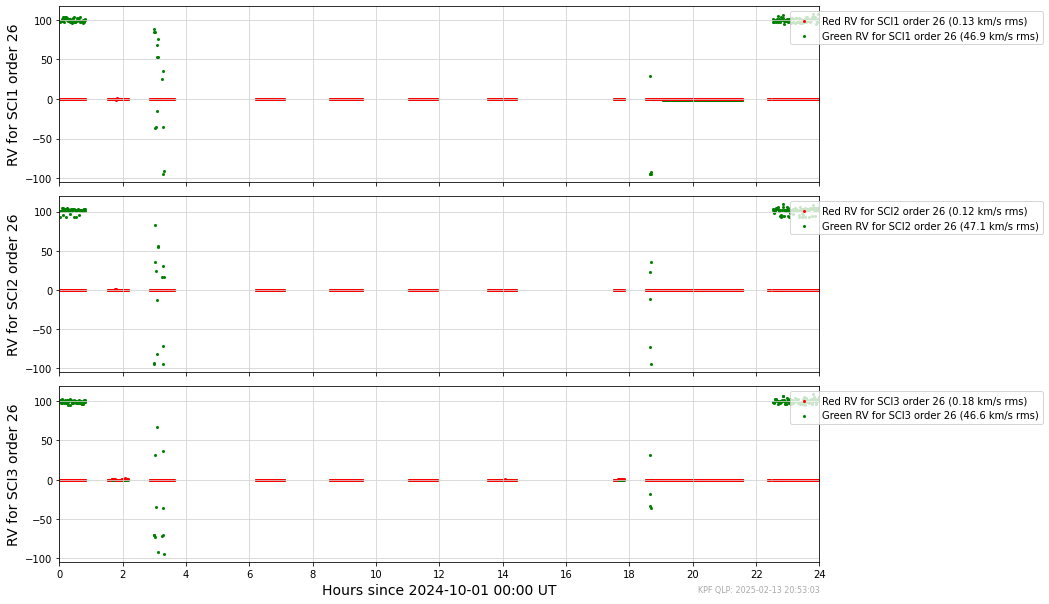

In [35]:
dict1 = {'col': 'RV125', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Green RV for SCI1 order 26', 'marker': '.', 'linewidth': 0.05, 'color': 'green'}}
dict2 = {'col': 'RV160', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Red RV for SCI1 order 26', 'marker': '.', 'linewidth': 0.05, 'color': 'red'}}
dict3 = {'col': 'RV225', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Green RV for SCI2 order 26', 'marker': '.', 'linewidth': 0.05, 'color': 'green'}}
dict4 = {'col': 'RV260', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Red RV for SCI2 order 26', 'marker': '.', 'linewidth': 0.05, 'color': 'red'}}
dict5 = {'col': 'RV325', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Green RV for SCI3 order 26', 'marker': '.', 'linewidth': 0.05, 'color': 'green'}}
dict6 = {'col': 'RV360', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Red RV for SCI3 order 26', 'marker': '.', 'linewidth': 0.05, 'color': 'red'}}
thispanelvars = [dict1, dict2]
thispaneldict = {'ylabel': 'RV for SCI1 order 26',
                 'legend_frac_size': 0.3}
orderletpanel1 = {'panelvars': thispanelvars,
                 'paneldict': thispaneldict}

thispanelvars2 = [dict3, dict4]
thispaneldict2 = {'ylabel': 'RV for SCI2 order 26',
                 'legend_frac_size': 0.3}
orderletpanel2 = {'panelvars': thispanelvars2,
                  'paneldict': thispaneldict2}

thispanelvars3 = [dict5, dict6]
thispaneldict3 = {'ylabel': 'RV for SCI3 order 26',
                 'subtractmedian': 'true',
                 'legend_frac_size': 0.3}
orderletpanel3 = {'panelvars': thispanelvars3,
                  'paneldict': thispaneldict3}

panel_arr = [orderletpanel1, orderletpanel2, orderletpanel3]

plotdict = {
             "description": "Etalon RVs per orderlet",
             "plot_type": "time_series_multipanel",
             "panel_arr": panel_arr
            }

myTS.plot_time_series_multipanel(plotdict, start_date=start_date, end_date=end_date, show_plot=True, clean=True)

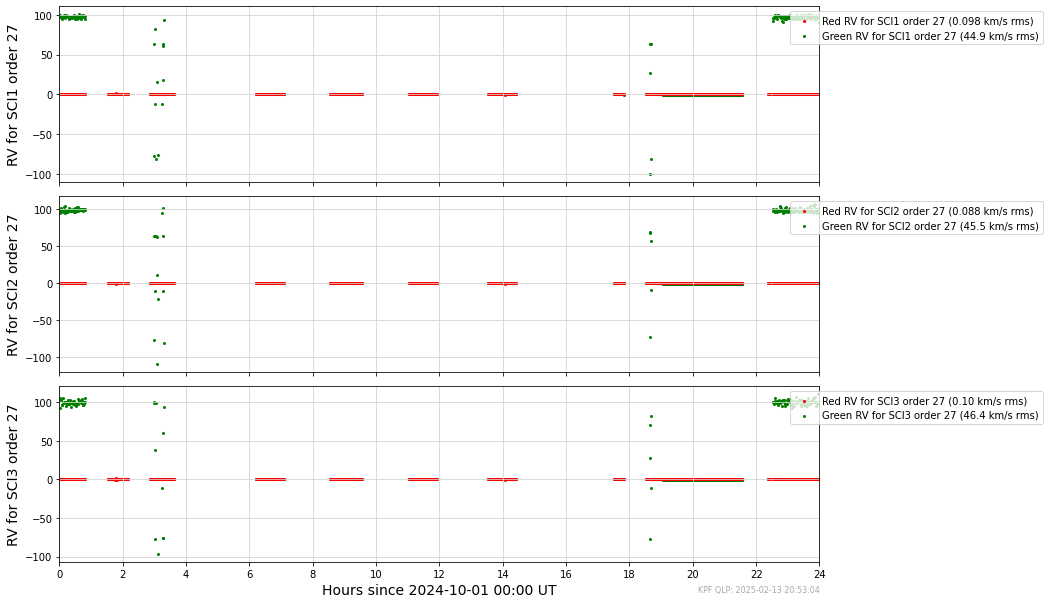

In [36]:
dict1 = {'col': 'RV126', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Green RV for SCI1 order 27', 'marker': '.', 'linewidth': 0.05, 'color': 'green'}}
dict2 = {'col': 'RV161', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Red RV for SCI1 order 27', 'marker': '.', 'linewidth': 0.05, 'color': 'red'}}
dict3 = {'col': 'RV226', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Green RV for SCI2 order 27', 'marker': '.', 'linewidth': 0.05, 'color': 'green'}}
dict4 = {'col': 'RV261', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Red RV for SCI2 order 27', 'marker': '.', 'linewidth': 0.05, 'color': 'red'}}
dict5 = {'col': 'RV326', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Green RV for SCI3 order 27', 'marker': '.', 'linewidth': 0.05, 'color': 'green'}}
dict6 = {'col': 'RV361', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Red RV for SCI3 order 27', 'marker': '.', 'linewidth': 0.05, 'color': 'red'}}
thispanelvars = [dict1, dict2]
thispaneldict = {'ylabel': 'RV for SCI1 order 27',
                 'legend_frac_size': 0.3}
orderletpanel1 = {'panelvars': thispanelvars,
                 'paneldict': thispaneldict}

thispanelvars2 = [dict3, dict4]
thispaneldict2 = {'ylabel': 'RV for SCI2 order 27',
                 'legend_frac_size': 0.3}
orderletpanel2 = {'panelvars': thispanelvars2,
                  'paneldict': thispaneldict2}

thispanelvars3 = [dict5, dict6]
thispaneldict3 = {'ylabel': 'RV for SCI3 order 27',
                 'subtractmedian': 'true',
                 'legend_frac_size': 0.3}
orderletpanel3 = {'panelvars': thispanelvars3,
                  'paneldict': thispaneldict3}

panel_arr = [orderletpanel1, orderletpanel2, orderletpanel3]

plotdict = {
             "description": "Etalon RVs per orderlet",
             "plot_type": "time_series_multipanel",
             "panel_arr": panel_arr
            }

myTS.plot_time_series_multipanel(plotdict, start_date=start_date, end_date=end_date, show_plot=True, clean=True)

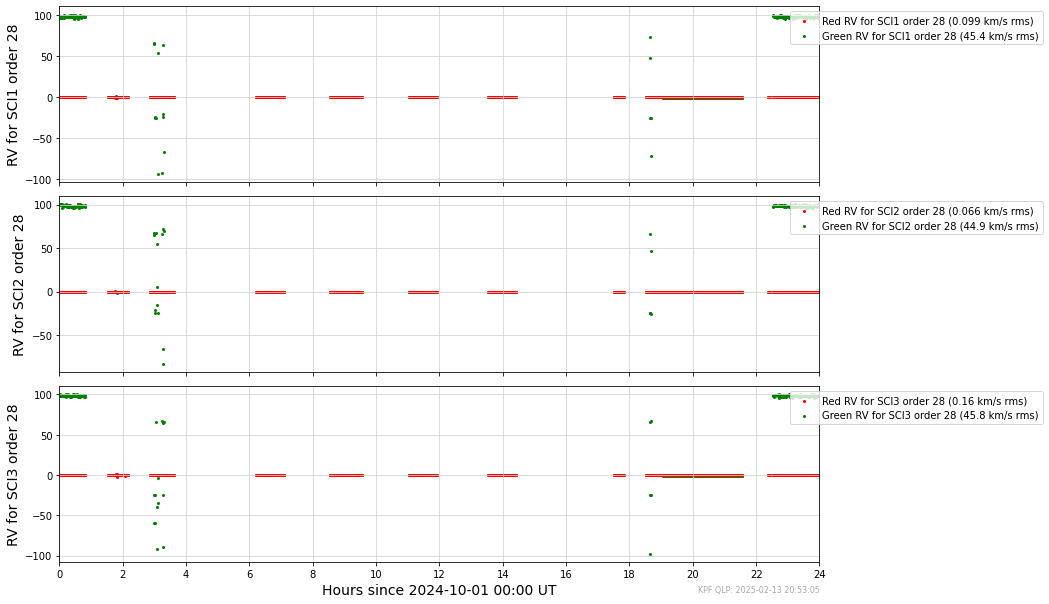

In [37]:
dict1 = {'col': 'RV127', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Green RV for SCI1 order 28', 'marker': '.', 'linewidth': 0.05, 'color': 'green'}}
dict2 = {'col': 'RV162', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Red RV for SCI1 order 28', 'marker': '.', 'linewidth': 0.05, 'color': 'red'}}
dict3 = {'col': 'RV227', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Green RV for SCI2 order 28', 'marker': '.', 'linewidth': 0.05, 'color': 'green'}}
dict4 = {'col': 'RV262', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Red RV for SCI2 order 28', 'marker': '.', 'linewidth': 0.05, 'color': 'red'}}
dict5 = {'col': 'RV327', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Green RV for SCI3 order 28', 'marker': '.', 'linewidth': 0.05, 'color': 'green'}}
dict6 = {'col': 'RV362', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Red RV for SCI3 order 28', 'marker': '.', 'linewidth': 0.05, 'color': 'red'}}
thispanelvars = [dict1, dict2]
thispaneldict = {'ylabel': 'RV for SCI1 order 28',
                 'legend_frac_size': 0.3}
orderletpanel1 = {'panelvars': thispanelvars,
                 'paneldict': thispaneldict}

thispanelvars2 = [dict3, dict4]
thispaneldict2 = {'ylabel': 'RV for SCI2 order 28',
                 'legend_frac_size': 0.3}
orderletpanel2 = {'panelvars': thispanelvars2,
                  'paneldict': thispaneldict2}

thispanelvars3 = [dict5, dict6]
thispaneldict3 = {'ylabel': 'RV for SCI3 order 28',
                 'subtractmedian': 'true',
                 'legend_frac_size': 0.3}
orderletpanel3 = {'panelvars': thispanelvars3,
                  'paneldict': thispaneldict3}

panel_arr = [orderletpanel1, orderletpanel2, orderletpanel3]

plotdict = {
             "description": "Etalon RVs per orderlet",
             "plot_type": "time_series_multipanel",
             "panel_arr": panel_arr
            }

myTS.plot_time_series_multipanel(plotdict, start_date=start_date, end_date=end_date, show_plot=True, clean=True)

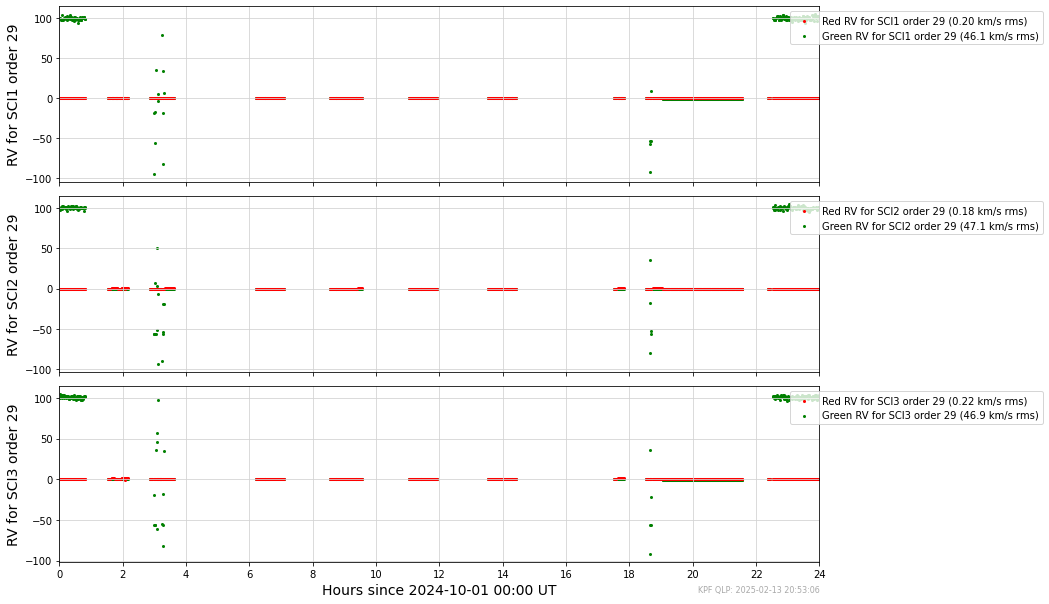

In [38]:
dict1 = {'col': 'RV128', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Green RV for SCI1 order 29', 'marker': '.', 'linewidth': 0.05, 'color': 'green'}}
dict2 = {'col': 'RV163', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Red RV for SCI1 order 29', 'marker': '.', 'linewidth': 0.05, 'color': 'red'}}
dict3 = {'col': 'RV228', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Green RV for SCI2 order 29', 'marker': '.', 'linewidth': 0.05, 'color': 'green'}}
dict4 = {'col': 'RV263', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Red RV for SCI2 order 29', 'marker': '.', 'linewidth': 0.05, 'color': 'red'}}
dict5 = {'col': 'RV328', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Green RV for SCI3 order 29', 'marker': '.', 'linewidth': 0.05, 'color': 'green'}}
dict6 = {'col': 'RV363', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Red RV for SCI3 order 29', 'marker': '.', 'linewidth': 0.05, 'color': 'red'}}
thispanelvars = [dict1, dict2]
thispaneldict = {'ylabel': 'RV for SCI1 order 29',
                 'legend_frac_size': 0.3}
orderletpanel1 = {'panelvars': thispanelvars,
                 'paneldict': thispaneldict}

thispanelvars2 = [dict3, dict4]
thispaneldict2 = {'ylabel': 'RV for SCI2 order 29',
                 'legend_frac_size': 0.3}
orderletpanel2 = {'panelvars': thispanelvars2,
                  'paneldict': thispaneldict2}

thispanelvars3 = [dict5, dict6]
thispaneldict3 = {'ylabel': 'RV for SCI3 order 29',
                 'subtractmedian': 'true',
                 'legend_frac_size': 0.3}
orderletpanel3 = {'panelvars': thispanelvars3,
                  'paneldict': thispaneldict3}

panel_arr = [orderletpanel1, orderletpanel2, orderletpanel3]

plotdict = {
             "description": "Etalon RVs per orderlet",
             "plot_type": "time_series_multipanel",
             "panel_arr": panel_arr
            }

myTS.plot_time_series_multipanel(plotdict, start_date=start_date, end_date=end_date, show_plot=True, clean=True)

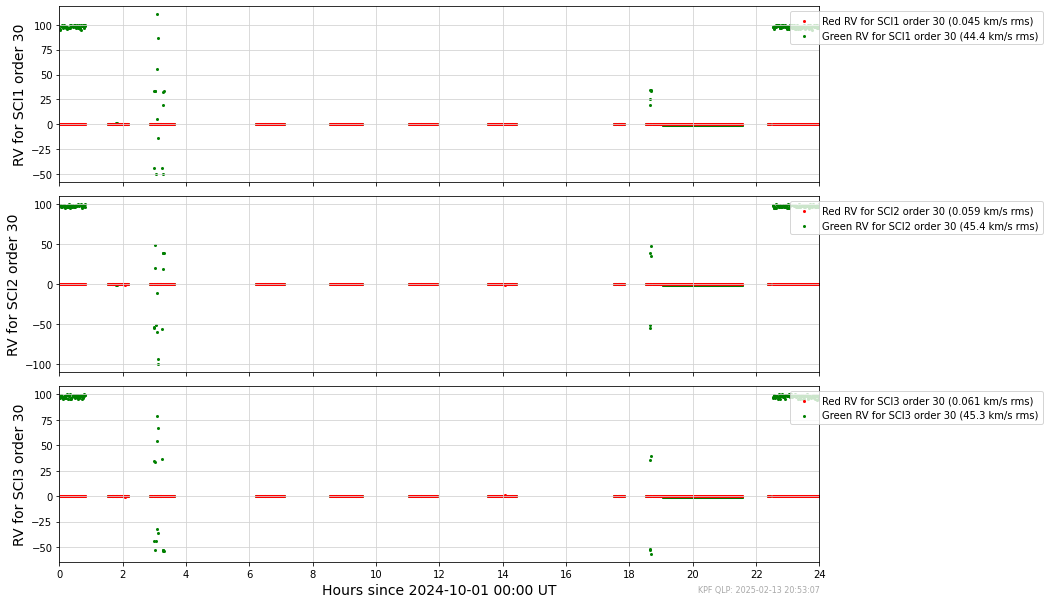

In [39]:
dict1 = {'col': 'RV129', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Green RV for SCI1 order 30', 'marker': '.', 'linewidth': 0.05, 'color': 'green'}}
dict2 = {'col': 'RV164', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Red RV for SCI1 order 30', 'marker': '.', 'linewidth': 0.05, 'color': 'red'}}
dict3 = {'col': 'RV229', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Green RV for SCI2 order 30', 'marker': '.', 'linewidth': 0.05, 'color': 'green'}}
dict4 = {'col': 'RV264', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Red RV for SCI2 order 30', 'marker': '.', 'linewidth': 0.05, 'color': 'red'}}
dict5 = {'col': 'RV329', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Green RV for SCI3 order 30', 'marker': '.', 'linewidth': 0.05, 'color': 'green'}}
dict6 = {'col': 'RV364', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Red RV for SCI3 order 30', 'marker': '.', 'linewidth': 0.05, 'color': 'red'}}
thispanelvars = [dict1, dict2]
thispaneldict = {'ylabel': 'RV for SCI1 order 30',
                 'legend_frac_size': 0.3}
orderletpanel1 = {'panelvars': thispanelvars,
                 'paneldict': thispaneldict}

thispanelvars2 = [dict3, dict4]
thispaneldict2 = {'ylabel': 'RV for SCI2 order 30',
                 'legend_frac_size': 0.3}
orderletpanel2 = {'panelvars': thispanelvars2,
                  'paneldict': thispaneldict2}

thispanelvars3 = [dict5, dict6]
thispaneldict3 = {'ylabel': 'RV for SCI3 order 30',
                 'subtractmedian': 'true',
                 'legend_frac_size': 0.3}
orderletpanel3 = {'panelvars': thispanelvars3,
                  'paneldict': thispaneldict3}

panel_arr = [orderletpanel1, orderletpanel2, orderletpanel3]

plotdict = {
             "description": "Etalon RVs per orderlet",
             "plot_type": "time_series_multipanel",
             "panel_arr": panel_arr
            }

myTS.plot_time_series_multipanel(plotdict, start_date=start_date, end_date=end_date, show_plot=True, clean=True)

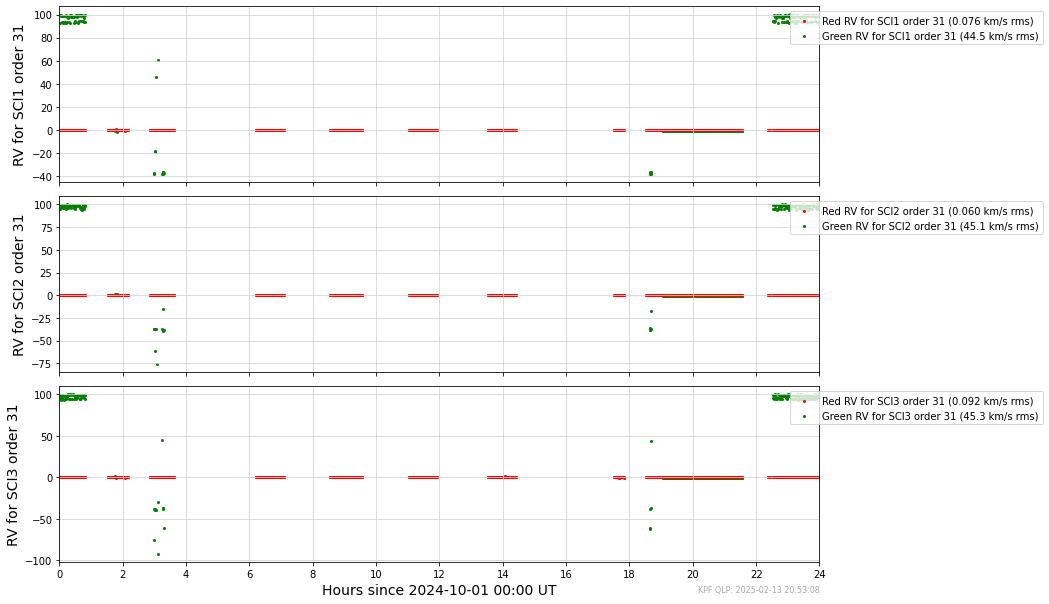

In [40]:
dict1 = {'col': 'RV130', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Green RV for SCI1 order 31', 'marker': '.', 'linewidth': 0.05, 'color': 'green'}}
dict2 = {'col': 'RV165', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Red RV for SCI1 order 31', 'marker': '.', 'linewidth': 0.05, 'color': 'red'}}
dict3 = {'col': 'RV230', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Green RV for SCI2 order 31', 'marker': '.', 'linewidth': 0.05, 'color': 'green'}}
dict4 = {'col': 'RV265', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Red RV for SCI2 order 31', 'marker': '.', 'linewidth': 0.05, 'color': 'red'}}
dict5 = {'col': 'RV330', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Green RV for SCI3 order 31', 'marker': '.', 'linewidth': 0.05, 'color': 'green'}}
dict6 = {'col': 'RV365', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Red RV for SCI3 order 31', 'marker': '.', 'linewidth': 0.05, 'color': 'red'}}
thispanelvars = [dict1, dict2]
thispaneldict = {'ylabel': 'RV for SCI1 order 31',
                 'legend_frac_size': 0.3}
orderletpanel1 = {'panelvars': thispanelvars,
                 'paneldict': thispaneldict}

thispanelvars2 = [dict3, dict4]
thispaneldict2 = {'ylabel': 'RV for SCI2 order 31',
                 'legend_frac_size': 0.3}
orderletpanel2 = {'panelvars': thispanelvars2,
                  'paneldict': thispaneldict2}

thispanelvars3 = [dict5, dict6]
thispaneldict3 = {'ylabel': 'RV for SCI3 order 31',
                 'subtractmedian': 'true',
                 'legend_frac_size': 0.3}
orderletpanel3 = {'panelvars': thispanelvars3,
                  'paneldict': thispaneldict3}

panel_arr = [orderletpanel1, orderletpanel2, orderletpanel3]

plotdict = {
             "description": "Etalon RVs per orderlet",
             "plot_type": "time_series_multipanel",
             "panel_arr": panel_arr
            }

myTS.plot_time_series_multipanel(plotdict, start_date=start_date, end_date=end_date, show_plot=True, clean=True)

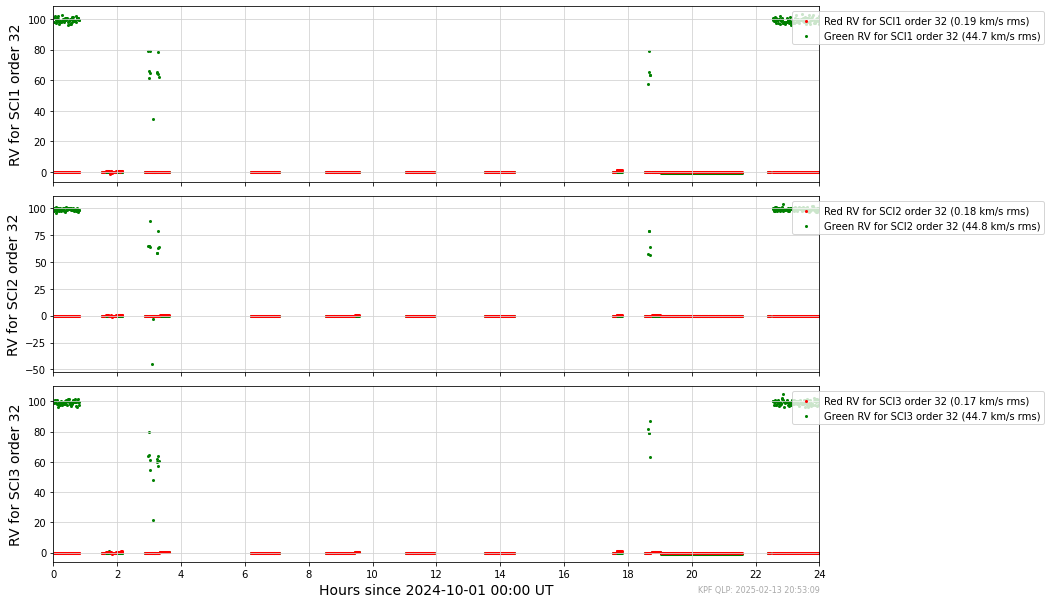

In [41]:
dict1 = {'col': 'RV131', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Green RV for SCI1 order 32', 'marker': '.', 'linewidth': 0.05, 'color': 'green'}}
dict2 = {'col': 'RV166', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Red RV for SCI1 order 32', 'marker': '.', 'linewidth': 0.05, 'color': 'red'}}
dict3 = {'col': 'RV231', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Green RV for SCI2 order 32', 'marker': '.', 'linewidth': 0.05, 'color': 'green'}}
dict4 = {'col': 'RV266', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Red RV for SCI2 order 32', 'marker': '.', 'linewidth': 0.05, 'color': 'red'}}
dict5 = {'col': 'RV331', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Green RV for SCI3 order 32', 'marker': '.', 'linewidth': 0.05, 'color': 'green'}}
dict6 = {'col': 'RV366', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Red RV for SCI3 order 32', 'marker': '.', 'linewidth': 0.05, 'color': 'red'}}
thispanelvars = [dict1, dict2]
thispaneldict = {'ylabel': 'RV for SCI1 order 32',
                 'legend_frac_size': 0.3}
orderletpanel1 = {'panelvars': thispanelvars,
                 'paneldict': thispaneldict}

thispanelvars2 = [dict3, dict4]
thispaneldict2 = {'ylabel': 'RV for SCI2 order 32',
                 'legend_frac_size': 0.3}
orderletpanel2 = {'panelvars': thispanelvars2,
                  'paneldict': thispaneldict2}

thispanelvars3 = [dict5, dict6]
thispaneldict3 = {'ylabel': 'RV for SCI3 order 32',
                 'subtractmedian': 'true',
                 'legend_frac_size': 0.3}
orderletpanel3 = {'panelvars': thispanelvars3,
                  'paneldict': thispaneldict3}

panel_arr = [orderletpanel1, orderletpanel2, orderletpanel3]

plotdict = {
             "description": "Etalon RVs per orderlet",
             "plot_type": "time_series_multipanel",
             "panel_arr": panel_arr
            }

myTS.plot_time_series_multipanel(plotdict, start_date=start_date, end_date=end_date, show_plot=True, clean=True)

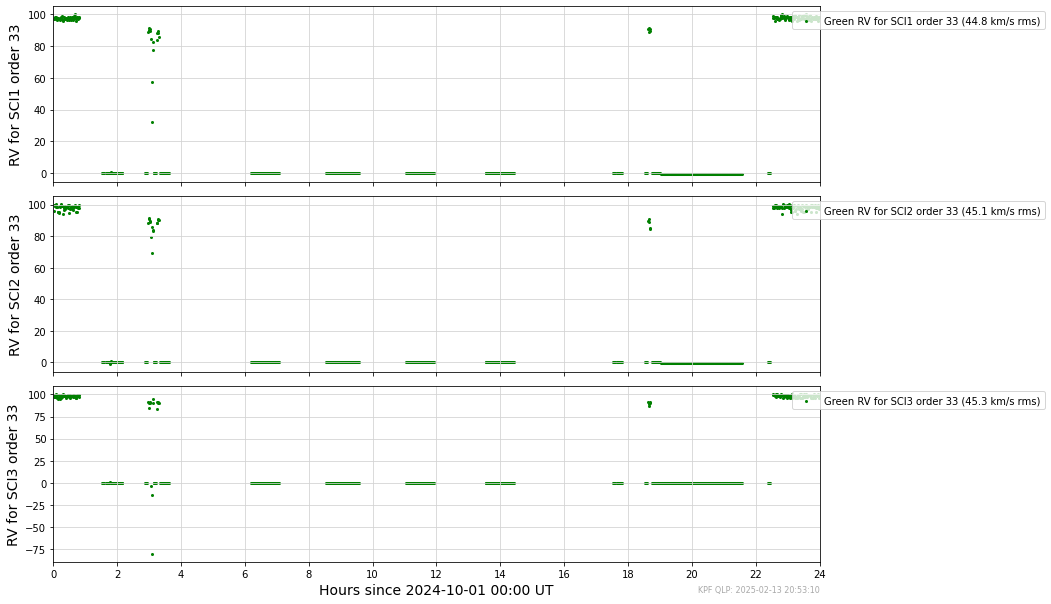

In [42]:
dict1 = {'col': 'RV132', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Green RV for SCI1 order 33', 'marker': '.', 'linewidth': 0.05, 'color': 'green'}}
dict2 = {'col': 'RV232', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Green RV for SCI2 order 33', 'marker': '.', 'linewidth': 0.05, 'color': 'green'}}
dict3 = {'col': 'RV332', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Green RV for SCI3 order 33', 'marker': '.', 'linewidth': 0.05, 'color': 'green'}}
thispanelvars = [dict1]
thispaneldict = {'ylabel': 'RV for SCI1 order 33',
                 'legend_frac_size': 0.3}
orderletpanel1 = {'panelvars': thispanelvars,
                 'paneldict': thispaneldict}

thispanelvars2 = [dict2]
thispaneldict2 = {'ylabel': 'RV for SCI2 order 33',
                 'legend_frac_size': 0.3}
orderletpanel2 = {'panelvars': thispanelvars2,
                  'paneldict': thispaneldict2}

thispanelvars3 = [dict3]
thispaneldict3 = {'ylabel': 'RV for SCI3 order 33',
                 'subtractmedian': 'true',
                 'legend_frac_size': 0.3}
orderletpanel3 = {'panelvars': thispanelvars3,
                  'paneldict': thispaneldict3}

panel_arr = [orderletpanel1, orderletpanel2, orderletpanel3]

plotdict = {
             "description": "Etalon RVs per orderlet",
             "plot_type": "time_series_multipanel",
             "panel_arr": panel_arr
            }

myTS.plot_time_series_multipanel(plotdict, start_date=start_date, end_date=end_date, show_plot=True, clean=True)

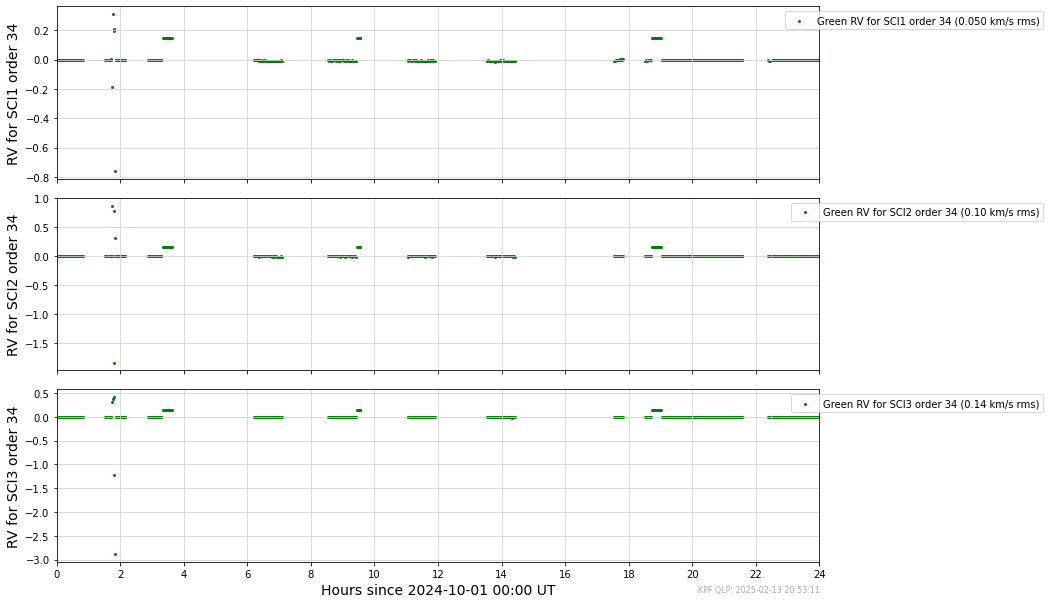

In [43]:
dict1 = {'col': 'RV133', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Green RV for SCI1 order 34', 'marker': '.', 'linewidth': 0.05, 'color': 'green'}}
dict2 = {'col': 'RV233', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Green RV for SCI2 order 34', 'marker': '.', 'linewidth': 0.05, 'color': 'green'}}
dict3 = {'col': 'RV333', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Green RV for SCI3 order 34', 'marker': '.', 'linewidth': 0.05, 'color': 'green'}}
thispanelvars = [dict1]
thispaneldict = {'ylabel': 'RV for SCI1 order 34',
                 'legend_frac_size': 0.3}
orderletpanel1 = {'panelvars': thispanelvars,
                 'paneldict': thispaneldict}

thispanelvars2 = [dict2]
thispaneldict2 = {'ylabel': 'RV for SCI2 order 34',
                 'legend_frac_size': 0.3}
orderletpanel2 = {'panelvars': thispanelvars2,
                  'paneldict': thispaneldict2}

thispanelvars3 = [dict3]
thispaneldict3 = {'ylabel': 'RV for SCI3 order 34',
                 'subtractmedian': 'true',
                 'legend_frac_size': 0.3}
orderletpanel3 = {'panelvars': thispanelvars3,
                  'paneldict': thispaneldict3}

panel_arr = [orderletpanel1, orderletpanel2, orderletpanel3]

plotdict = {
             "description": "Etalon RVs per orderlet",
             "plot_type": "time_series_multipanel",
             "panel_arr": panel_arr
            }

myTS.plot_time_series_multipanel(plotdict, start_date=start_date, end_date=end_date, show_plot=True, clean=True)

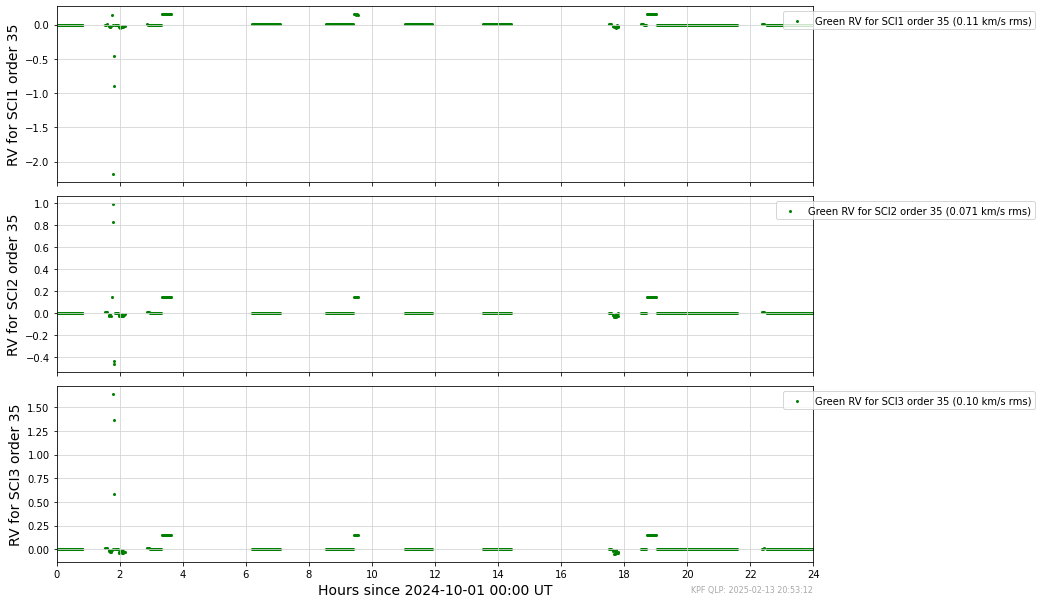

In [44]:
dict1 = {'col': 'RV134', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Green RV for SCI1 order 35', 'marker': '.', 'linewidth': 0.05, 'color': 'green'}}
dict2 = {'col': 'RV234', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Green RV for SCI2 order 35', 'marker': '.', 'linewidth': 0.05, 'color': 'green'}}
dict3 = {'col': 'RV334', 'plot_type': 'scatter', 'unit': 'km/s', 'plot_attr': {'label':'Green RV for SCI3 order 35', 'marker': '.', 'linewidth': 0.05, 'color': 'green'}}
thispanelvars = [dict1]
thispaneldict = {'ylabel': 'RV for SCI1 order 35',
                 'legend_frac_size': 0.3}
orderletpanel1 = {'panelvars': thispanelvars,
                 'paneldict': thispaneldict}

thispanelvars2 = [dict2]
thispaneldict2 = {'ylabel': 'RV for SCI2 order 35',
                 'legend_frac_size': 0.3}
orderletpanel2 = {'panelvars': thispanelvars2,
                  'paneldict': thispaneldict2}

thispanelvars3 = [dict3]
thispaneldict3 = {'ylabel': 'RV for SCI3 order 35',
                 'subtractmedian': 'true',
                 'legend_frac_size': 0.3}
orderletpanel3 = {'panelvars': thispanelvars3,
                  'paneldict': thispaneldict3}

panel_arr = [orderletpanel1, orderletpanel2, orderletpanel3]

plotdict = {
             "description": "Etalon RVs per orderlet",
             "plot_type": "time_series_multipanel",
             "panel_arr": panel_arr
            }

myTS.plot_time_series_multipanel(plotdict, start_date=start_date, end_date=end_date, show_plot=True, clean=True)